# How Close Are NBS Students To Their Classmates?
*By Cheng Jin Yee and Jeremy Jerome Chia - CE9010 - 18 April 2018 (AY 1718 S2)*
This project has been hosted onto github https://github.com/CE9010Group2/DataScienceProject.git

## Introduction

This is a data science project that is prepared in fulfilment of the module requirements (*CE9010 - Introduction to Data Science*). This notebook will discuss the following:

* The Data - Problem, Acquisition and Exploration
* Pre-Processing and Data Analysis

This study drew samples solely from full-time undergraduate NTU students from Nanyang Business School (NBS). (henceforth referred to as *"NBS students"*)

### Acknowledgements

We would like to acknowledge the people who have contributed to this study:

* Assoc. Prof. Xavier Bresson, for his guidance and materials which helped us in the development of this project.
* Participants of the Survey, who formed the basis of this study. Thank you for your inputs and for sharing your thoughts with us.


## Objective & The Data Problem<br>

The aim of our study is to investigate if, and the extent to which, various factors will affect NBS students' perception of how close they are to their classmates. Regression is primarily the method used to determine this. This is because we aim to predict a closeness ranking value given the different factors.

By finding out what factors influence NBS students the most, we intend to use the discoveries from this study to develop the experience for the upcoming Freshmen Welcome Week in August 2018 in terms of groupings and opportunities for interaction, in a bid to give them a headstart in fostering closer friendships throughout their course of study in NBS.



## Data Acquisition

Over a period of 3 weeks, from 25 Feb 2018 to 18 Mar 2018, NBS students were invited to participate in an anonymous survey titled "**Social Perceptions - Friends (NBS)**". The link to the survey is at [https://goo.gl/forms/rQbGy9R7OlTBaIGc2](https://goo.gl/forms/rQbGy9R7OlTBaIGc2). To ensure that there was no repeated data and the integrity of the data would be preserved, the *"limit to one response"* option was selected and access to the results are accessible only by the people working on this project.

They were asked a series of questions about the following:

1. What orientation camps did they attend?
2. What year of study are they in?
3. What level of *closeness* to they feel to different groups of people?
4. What do they look for in friendships?
5. How often do they meet their closest group of friends?

The survey responses were recorded, exported to a Google sheet file and was subsequently converted to a `.txt` file with delimiter `'\t'` to use for the purposes of this notebook.

This survey received **194** responses.

### Filtering of Responses (Data)

One of the factors taken into consideration for determining the level of closeness is the number of times they met their closest group of friends. As we wanted to get an unbiased response, we only asked this question once. Therefore, of the 194 responses gathered, we will only perform an analysis on those who ranked their classmates as the closest. The number of filtered responses for those who indicated classmates as their closest is **85**.

The filtering condition is who they considered to be the closest to get a more accurate data representation. We illustrate the filtering process below.

|Classmates|FacCamp|Big4|Hall|CCA|Maximum|Remarks|
|----------|-------|----|----|---|-------|:------|
|4|2|0|0|4|Classmate|- If the top response is "Classmate" and another category, "Classmate" will prevail as the top category.
|9|1|0|0|6|Classmate|- The top response is 9, corresponding to "Classmate".
|5|4|0|0|7|CCA|- Sample of what was classified as "CCA".
|1|1|0|3|2|Hall|- It is irrevalant how high the response is, the top numerical response becomes the "maximum".
|8|9|0|10|0|Hall|- Sample of what was classified as "Hall".
|7|9|0|0|0|FacCamp|- Sample of what was classified as "FacCamp".
|6|0|8|0|5|Big4|- Sample of what was classified as "Big4".

An interpretation of the results in this portion is explained under "Perception of Closeness" in the following section.


Where:
* FacCamp refers to *friends from faculty camps*. (i.e. NBS FOC, NBS Zenith, NBS Rush, NBS Inflammare or NBS Colour Splash)
* Big4 refers to *friends from Union Orientation Camp (UOC), Cultural Activities Club (CAC) Camp, Sports Camp or Welfare Services Club (WSC) Camp*.
* Hall refers to *friends from their respective hall of residences*.
* CCA refers to *friends from Co-Curricular Activities*. (interest groups, societies, sports teams, performing groups etc.)
* Maximum refers to which category has a the highest response.

### Interpretting the Responses

In this section we focus on explaining how to interpret several variables:

#### Perception of Closeness (`y`)

Participants were asked to provide a response on how close their were to their various groups of friends.

* 10 represents the most close,
* 1 represents the least close.
* 0 is if they do not have friends from this category (i.e. N.A.)

#### Dimension of Expectations ("What makes you feel close to your friends?") (`x1`)

The responses received were qualitative in nature, and we used a framework to classify the qualitative responses into a continuous variable for analysis. This conversion framework was inspired by the paper: [*Friendship Standards: The Dimensions of Ideal Expectations* (Hall, J., 2007)](https://pdfs.semanticscholar.org/ad96/8dd81155705d2853f43936ff7777b7482795.pdf). Hall proposed a four-dimensional model of friendship expectations (Pg. 8):

1. Agency - *"Those from whom benefits can be gained"*
2. Solidarity - *Invited to share common activities.*
3. Communion - *Emotional Availability, Self-Disclosure, Empathy Undersstanding.*
4. Symmetrical Reciprocity - *Loyalty, Trustworthiness, Genuinity, Support.*

The table below provides examples of this classification.

|Classification|Value|Quanitative Input|
|--------------|-----|-----------------|
|Agency|1|doing project|
|Solidatiry|2|Time spent hanging out, common talking topics|
|Communion|3|The way we can chit chat and talk about what happened in the first few semesters even at this point in time|
|Symmetrical Reciprocity|4|Being able to connect deeply with them and being able to be comfortable with them. Not getting judged.|

***

#### How Often Do You Meet Your Closest Group of Friends? (`x2`)

For simplicity of they were asked to select from a category. Subsequently, we took the *middle* value of the category to assign a number which represents the number of times they meet **per week**. The assignments are as follows:

|Category|Value|Calculation|
|--------|-----|-----------|
|Every week|1.00|
|2-3 Times a Week|2.50|= (2+3)/2
|Almost every day|6.00|
|Every Month or Less|0.03|= 1/30
|2-3 Times a Month|0.58|= ((2+3)/2*30/7)

***

### Upload of Data File

We used [Google Colab](https://colab.research.google.com/) in the development of this project.

If you are running this code on another computer, or an **offline** file, please replace the below code section with the one that is current used below.

In [17]:
###########################################################################
# This is the code used for working on Google Colabs, because of the lack #
# of a directory to upload the files onto, and thus we used this function #
###########################################################################

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))
  
  
###########################################################################
# If you're running this notebook offline, and you have the file named as #
# result.txt in the same directory, use the following code instead        #
###########################################################################

# fn = open("result.txt","r")

## Data Exploration

In this section we will use several visualisation libraries to visualise the data.

### Libraries

In the development of this project, we used:

1. [`numpy`](http://www.numpy.org/) as `np`
2. [`matplotlib.pyplt`](https://matplotlib.org/api/pyplot_api.html) as `plt`
3. [`scikit-learn library`](http://scikit-learn.org/stable/)
4. [`scipy`](https://scipy.org/scipylib/)

This list is not exhaustive, and there will be more that are uploaded at a later point in the notebook.

In [0]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# scikit-learn library
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# scientific computing library
from scipy.optimize import minimize
from scipy.optimize import fsolve

# remove warning
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

# computational time
import time

### Visualisation Functions

In [0]:
# histogram graph for distribution of data features 1 & 2
def plot_histogram_graph1(data, title, colour, xlabel):
    
    plt.hist(data, cumulative = False , color = colour)
    
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    
    plt.title(title)
    plt.show()

# box plot for visualisation of features 1 and 2
def plot_boxplot(data, title):
    
    plt.figure()
    plt.boxplot(data, title, 'gD')
    plt.title('Distribution of '+title)
    plt.show()
    
# pie graph for distribution of data feature 3
def plot_pie_graph(data, title):
    
    labels = [1,2,3,4]
    sizes = [np.count_nonzero(data == 1),
             np.count_nonzero(data == 2),
             np.count_nonzero(data == 3),
             np.count_nonzero(data == 4)]
    explode = (0.1, 0.1, 0.1, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', counterclock=False, startangle=90)
    ax1.axis('equal')   
    
    
    plt.title(title)
    plt.axis('equal')
    plt.show()

# pie graph for distribution of data feature 3
def plot_scatter_graph(data, title): 
  
    x_feature1 = data[:,0]
    x_feature2 = data[:,1]
    x_feature3 = data[:,2]
    y_train = data[:,3]

    fig = plt.figure()
    ax = fig.add_subplot (111, projection = '3d')
    # to expand graph size
    fig.tight_layout() 

    color = [str(item/255.) for item in y_train]
    ax.scatter(x_feature1, x_feature2, x_feature3, marker='o',c=color)

    ax.set_xlabel('Number of Times Met Per Week ')
    ax.set_ylabel('Dimensions of Expectation')
    ax.set_zlabel('Year of Study')

    plt.title(title)
    plt.show()
    

### Visualisation 

We will be using 3 data features in our model:


* Feature 1: Number of Times Met Per Week (Taken from variable: How Often do you Meet Your Closest Group of Friends)
* Feature 2: Dimensions of Expectation (Taken from variable: Dimensions of Expectation)
* Feature 3: Year of Study (Taken from variable: Year of Study)

The following graphs will illustrate the distribution of each data features result obtained.

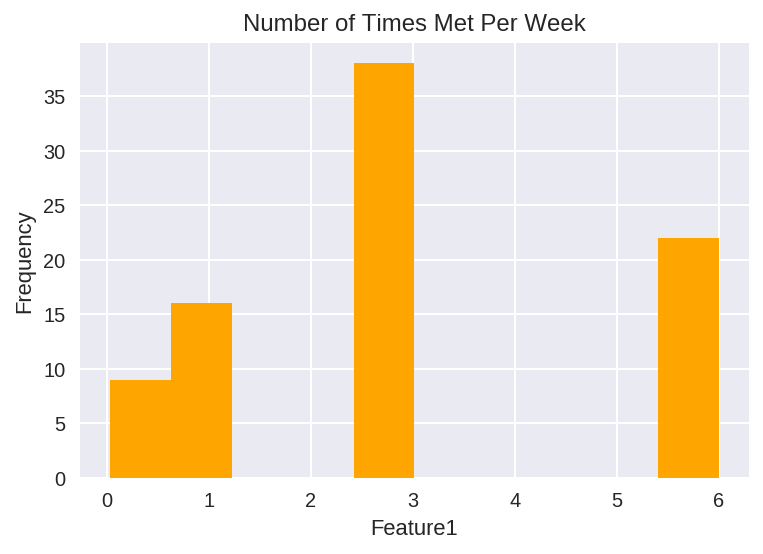

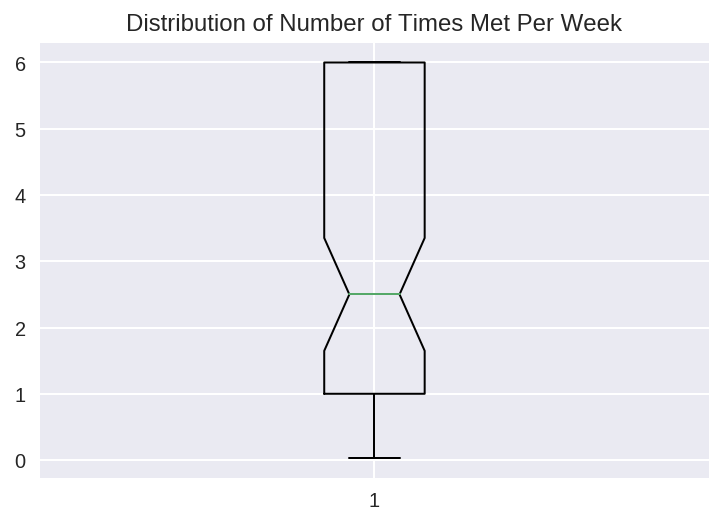

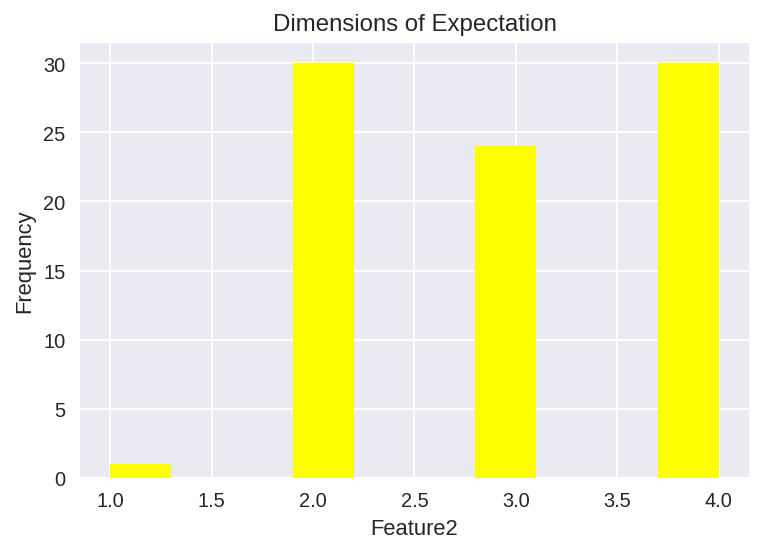

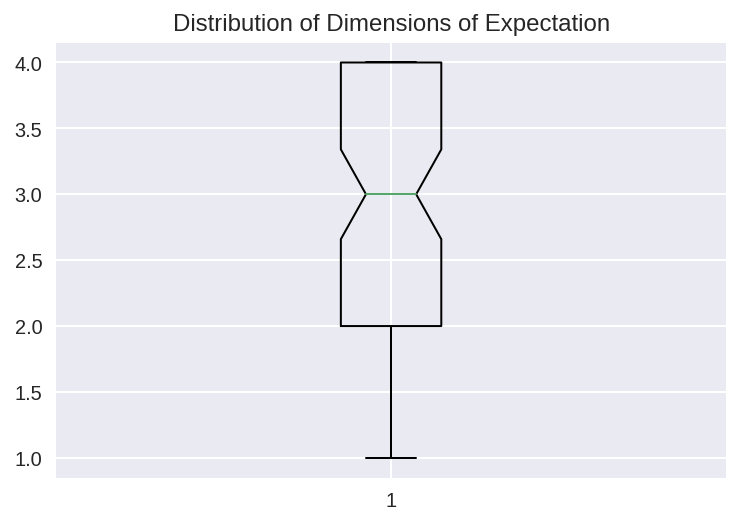

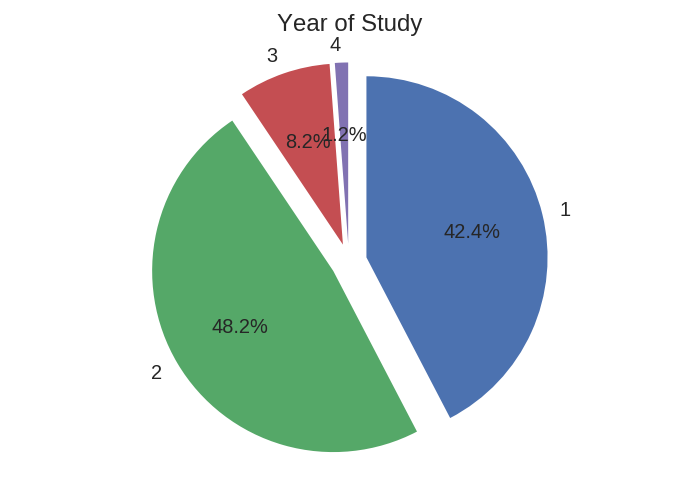

In [20]:
data = np.loadtxt(fn, delimiter='\t')

x_feature1 = data[:,0]
x_feature2 = data[:,1]
x_feature3 = data[:,2]

plot_histogram_graph1(x_feature1,'Number of Times Met Per Week','orange','Feature1')
plot_boxplot(x_feature1,'Number of Times Met Per Week')
plot_histogram_graph1(x_feature2,'Dimensions of Expectation','yellow','Feature2')
plot_boxplot(x_feature2,'Dimensions of Expectation')
plot_pie_graph(x_feature3,'Year of Study')

## Pre-Processing

In this section will we will remove noise data and perform normalisation on the data.

### Splitting into Training, Validation and Test Sets

As discussed earlier, we have **85** responses which will be split into 3 different sets:

* Training set ($60\%$) (51) 
* Validation set ($20\%$) (17)
* Test set ($20\%$) (17)

To show that the sets are different, the five sets of data is displayed.


In [21]:
data = np.loadtxt(fn, delimiter='\t')

#Raw Data 
train_data = data[:51,:]
print("items in train_data:",train_data.shape[0])
print("displaying 5 items from train_data")
print(train_data[:5,],end="\n\n")

val_data = data[51:68,:]
print("items in val_data:",val_data.shape[0])
print("displaying 5 items from val_data")
print(val_data[:5,],end="\n\n")

test_data = data[68:86,:] 
print("items in test_data:",test_data.shape[0])
print("displaying 5 items from test_data")
print(test_data[:5,],end="\n\n")

items in train_data: 51
displaying 5 items from train_data
[[ 1.   2.   1.   2. ]
 [ 1.   4.   2.  10. ]
 [ 1.   3.   2.  10. ]
 [ 2.5  2.   2.  10. ]
 [ 1.   3.   2.   1. ]]

items in val_data: 17
displaying 5 items from val_data
[[2.5        3.         2.         9.        ]
 [0.58333333 4.         2.         7.        ]
 [6.         3.         1.         8.        ]
 [2.5        2.         1.         7.        ]
 [1.         4.         1.         7.        ]]

items in test_data: 17
displaying 5 items from test_data
[[ 0.03333333  3.          1.          3.        ]
 [ 2.5         4.          1.          8.        ]
 [ 6.          4.          1.         10.        ]
 [ 1.          4.          2.          7.        ]
 [ 2.5         3.          1.          7.        ]]



### Normalisation of Data

We used scikit-learn's preprocessing [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to perform normalisation of the data. Effetively, this function scales individual samples to have unit norm.

StandardScaler uses z-scoring as a means of normalising the data. For the data $x_1$, $x_2$, $x_3$ and $y$, the mean, $\bar{x}_i$ and standard deviation, $\sigma_i$ is given as below: 

$$
\bar{x}_i = \left[ 
\begin{array}{cccc}
2.89 & 2.98 & 1.68 & 6.84
\end{array} 
\right]
$$

$$
\sigma_i = \left[ 
\begin{array}{cccc}
1.99 & 0.87 & 0.67 & 2.80
\end{array} 
\right]
$$

The z-scoring proceeds as:

$$z_i = \frac{x_i-\bar{x}_i}{\sigma_i}$$





In [22]:
#Normalised Data

# z-scoring
data_mean = np.mean(data,axis=0)
print('data_mean:',data_mean)
data_std = np.std(data,axis=0)
print('data_std:',data_std,end="\n\n")

normalized_data = StandardScaler().fit_transform(data)

# storing it in the variables
n_train_data = normalized_data[:51,:]
print("items in n_train_data:",n_train_data.shape[0])
print("displaying 5 items from n_test_data")
print(n_train_data[:5,],end="\n\n")

n_val_data = normalized_data[51:68,:]
print("items in val_data:",n_val_data.shape[0])
print("displaying 5 items from n_val_data")
print(n_val_data[:5,],end="\n\n")

n_test_data = normalized_data[68:86,:] 
print("items in test_data:",n_test_data.shape[0])
print("displaying 5 items from n_test_data")
print(n_test_data[:5,],end="\n\n")



data_mean: [2.89470588 2.97647059 1.68235294 6.84705882]
data_std: [1.98513135 0.86740276 0.67234033 2.79708202]

items in n_train_data: 51
displaying 5 items from n_test_data
[[-0.95444862 -1.1257407  -1.01489217 -1.73289835]
 [-0.95444862  1.17999327  0.4724498   1.12722514]
 [-0.95444862  0.02712628  0.4724498   1.12722514]
 [-0.19883112 -1.1257407   0.4724498   1.12722514]
 [-0.95444862  0.02712628  0.4724498  -2.09041379]]

items in val_data: 17
displaying 5 items from n_val_data
[[-0.19883112  0.02712628  0.4724498   0.76970971]
 [-1.16434237  1.17999327  0.4724498   0.05467883]
 [ 1.5642764   0.02712628 -1.01489217  0.41219427]
 [-0.19883112 -1.1257407  -1.01489217  0.05467883]
 [-0.95444862  1.17999327 -1.01489217  0.05467883]]

items in test_data: 17
displaying 5 items from n_test_data
[[-1.44140213  0.02712628 -1.01489217 -1.37538292]
 [-0.19883112  1.17999327 -1.01489217  0.41219427]
 [ 1.5642764   1.17999327 -1.01489217  1.12722514]
 [-0.95444862  1.17999327  0.4724498   0.

Before normalisation, the values are

In [23]:
print("The first five values before normalisation are:")
print(data[:5,])

The first five values before normalisation are:
[[ 1.   2.   1.   2. ]
 [ 1.   4.   2.  10. ]
 [ 1.   3.   2.  10. ]
 [ 2.5  2.   2.  10. ]
 [ 1.   3.   2.   1. ]]


After normalisation, the values are:

In [24]:
print("The first five values post-normalisation are:")
print(n_train_data[:5,])

The first five values post-normalisation are:
[[-0.95444862 -1.1257407  -1.01489217 -1.73289835]
 [-0.95444862  1.17999327  0.4724498   1.12722514]
 [-0.95444862  0.02712628  0.4724498   1.12722514]
 [-0.19883112 -1.1257407   0.4724498   1.12722514]
 [-0.95444862  0.02712628  0.4724498  -2.09041379]]


### Visualisation of the Normalisation of Data

To illustrate the importance of normalising of data, we will present you with the scatter plot graph of the data sets before scaling and after scaling. 

Notice here that the scaling of the plot is different between the 2 scatter plot graphs.



Post-Normalisation Mean:  [0. 0. 0. 0.]
Post-Normalisation Standard Deviation:  [1. 1. 1. 1.]



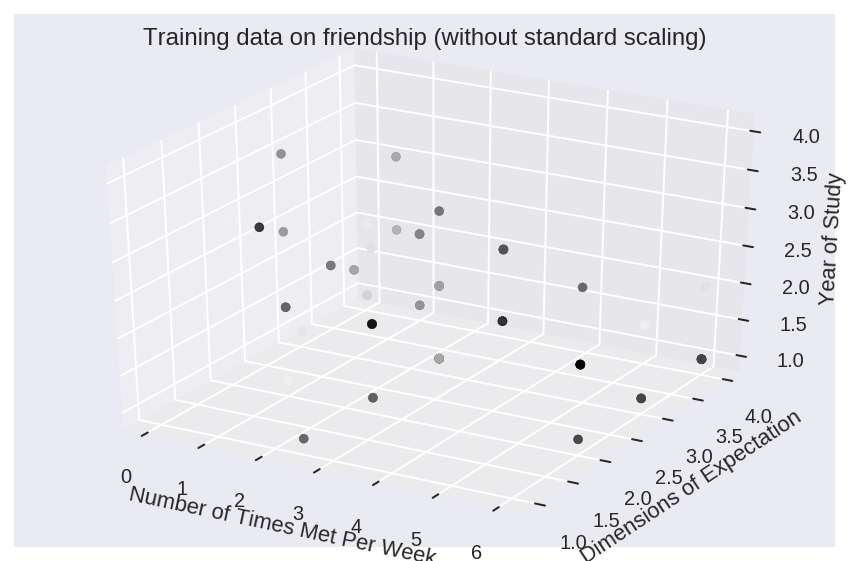

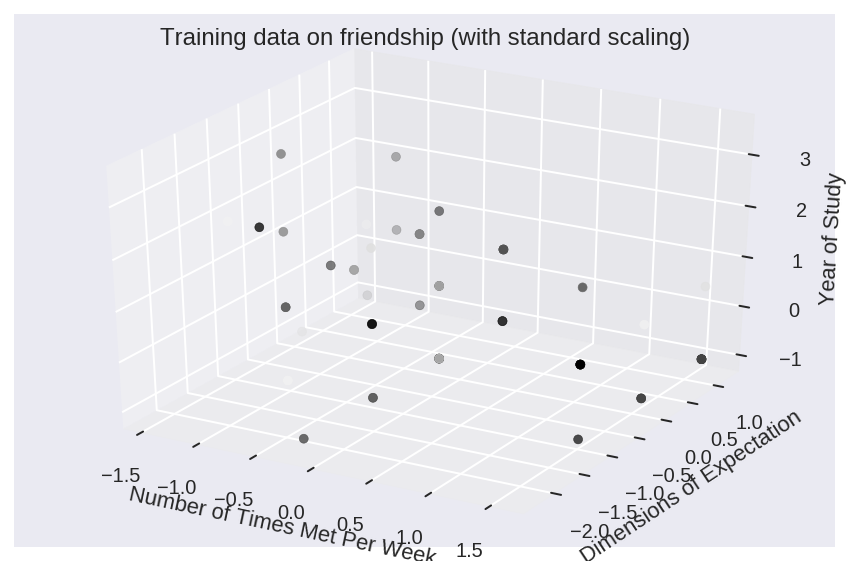

In [25]:
print("Post-Normalisation Mean: ",np.abs(np.round(np.mean(normalized_data,axis=0),decimals=0)))
print("Post-Normalisation Standard Deviation: ",np.std(normalized_data,axis=0),end="\n\n")

plot_scatter_graph(data,'Training data on friendship (without standard scaling)')
print()
plot_scatter_graph(normalized_data,'Training data on friendship (with standard scaling)')

Our data features have different units and hence different scale. In this case, normalisation helps to scale our data to a common unit scale so the values can converge and not be overly skewed. 

This will also ensure that weight of the coefficient of the model will not be influenced by features with bigger mangnitude so that our model can be modelled more realistically and assist in better performance in the later part of the data analysis.


## Data Analysis

### Functions

The following functions will be used in the data analysis.

***

1. Predictive Function (`f_pred`)
$f_w(x) = Xw$

2. Loss - Mean Square Error (`loss_mse`):
$L(w)=\frac{1}{n}(Xw-y)^T(Xw-y)$

3. Gradient Loss (`grad_loss`):
$\frac{\partial}{\partial w} L(w) = \frac{2}{n} X^T(Xw-y)$

4. Computing $w$ (`compute_w_solution`): Using [`scipy.optimize.minimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) to find the loss.

5. Computing error (`compute_error`): Calculate the percentage of error where error is defined when difference between train_y and predicted y value > 0.5. This threshold is selected by contemplating the effect of normalisation, so that error is only 1s.d away.

***

Where $X$ is the data matrix $w$ is the variable vector.


In [0]:
# Definitions of all functions

# predictive function definition
def f_pred(X,w): 
    f = X.dot(w) 
    return f 
  
# loss function definition
def loss_mse(w,X,y,reg): 
    n = len(y)
    w = w.squeeze()[:,None]
    y_pred = f_pred(X,w)
    loss = 1/n* (y_pred - y).T.dot(y_pred - y)
    d = w.shape[0]
    loss += reg/d * w.T.dot(w)
    return loss

# gradient loss definition
def grad_loss(y_pred,y,X):
    n = len(y)
    grad = 2/n* X.T.dot(y_pred-y)
    return grad

# gradient descent algorithm
def grad_desc(X, y , w_init=np.array([0,0])[:,None] ,tau=0.01, max_iter=500):

    L_iters = np.zeros([max_iter]) # record the loss values
    w_iters = np.zeros([max_iter,2]) # record the loss values
    w = w_init # initialization
    for i in range(max_iter): # loop over the iterations
        y_pred = f_pred(X,w) # linear predicition function 
        grad_f = grad_loss(y_pred,y,X) # gradient of the loss 
        w = w - tau* grad_f # update rule of gradient descent 
        L_iters[i] = loss_mse(y_pred,y) # save the current loss value 
        w_iters[i,:] = w[0],w[1] # save the current w value 
        
    return w, L_iters, w_iters 

# computing the best w
def compute_w_solution(X,y,reg):
    initial_w = np.zeros((X.shape[1],1))
    result = minimize(loss_mse, initial_w, args=(X,y,reg), method='Powell', options={'maxiter':2000})
    w_solution = np.array(result.x)[:,None]
    loss_solution = loss_mse(w_solution,X,y,reg)
    return w_solution, loss_solution

# computing the error
def compute_error(X,w,y):
    pred = f_pred(X,w)
    diff = y - pred
    non_error = (np.abs(diff) <= 0.5).sum().astype('int').squeeze()
    accuracy = (non_error/len(diff))*100
    return 100-accuracy

# to plot a graph
def plot_error_loss(figure,x,train,val,label_train,label_val,title,xlabel,ylabel):
    plt.figure(figure)
    plt.plot(x, train,label=label_train.format(i=1))
    plt.plot(x, val,label=label_val.format(i=2))
    plt.legend(loc='best')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

### Hyper-Parameters of the Model

To ensure that we have enough learning capacity, we will over-fit our training data.

As mentioned earlier, we have only **51** training data sets which is not a large number of training data sets. Hence, we will be using all our training data instead of extracting a subset of our training data for this process.

We will find the error and loss for varying dimensions, from $d=1$ through to $d=15$. Subsequently, we produced some graphs to observe the results. We will scale this to a smaller range to observe the effects in the next section.

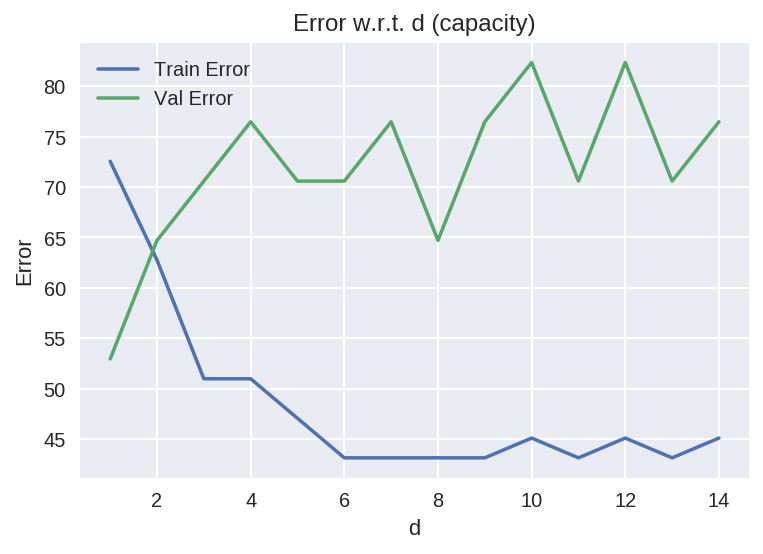

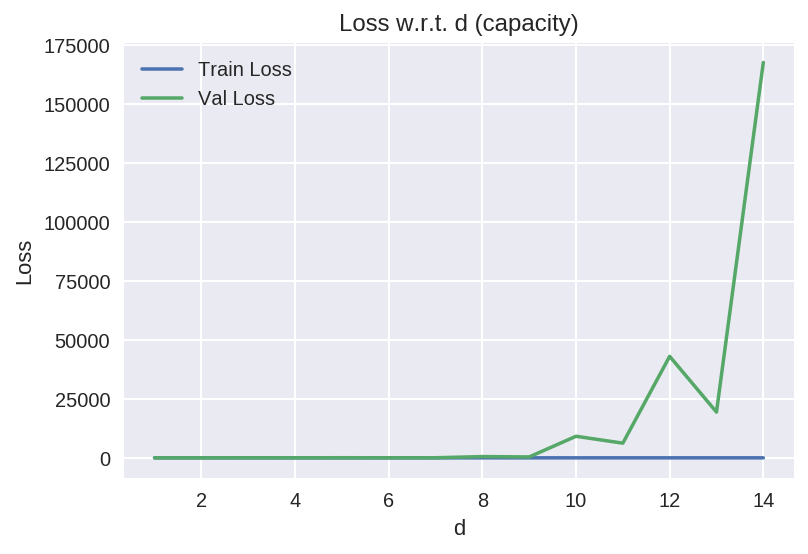

In [27]:
# List of values of the polynomial degree d
list_d = list(range(1,15))

train_error = np.zeros(len(list_d))
val_error= np.zeros(len(list_d))
train_loss = np.zeros(len(list_d))
val_loss = np.zeros(len(list_d))

train_y = n_train_data[:,3][:,None] 
val_y = n_val_data[:,3][:,None]

for i,d in enumerate(list_d):
    
    poly = PolynomialFeatures(d)
    
    train_X = poly.fit_transform(n_train_data[:,0:3])
    train_w_solution, train_loss[i] = compute_w_solution(train_X,train_y,0) 
    train_error[i] = compute_error(train_X,train_w_solution,train_y)
    
    val_X = poly.fit_transform(n_val_data[:,0:3])
    val_error[i] = compute_error(val_X,train_w_solution,val_y)
    val_loss[i] = loss_mse(train_w_solution,val_X,val_y,0)

  
#plot Error
x = list_d
plot_error_loss(1,x,train_error,val_error,'Train Error','Val Error','Error w.r.t. d (capacity)','d','Error')

#plot Loss
plot_error_loss(2,x,train_loss,val_loss,'Train Loss','Val Loss','Loss w.r.t. d (capacity)','d','Loss')

We will establish that when error tends towards 0, the model is a better fit. As for loss, the lower the loss, the better.

We have scaled the graph to the ($1<d<9$) range as this is the range where minimum loss is found.



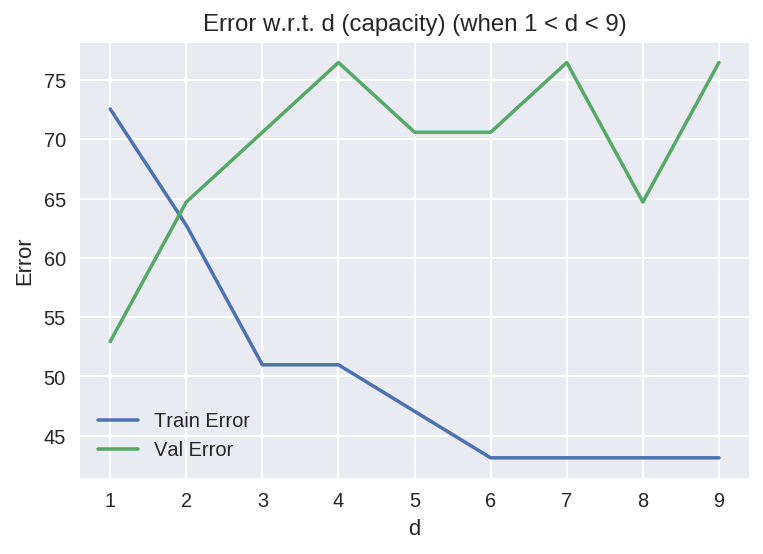

train_error (%):  [72.55 62.75 50.98 50.98 47.06 43.14 43.14 43.14 43.14 45.1  43.14 45.1
 43.14 45.1 ]
val_error (%):  [52.94 64.71 70.59 76.47 70.59 70.59 76.47 64.71 76.47 82.35 70.59 82.35
 70.59 76.47]



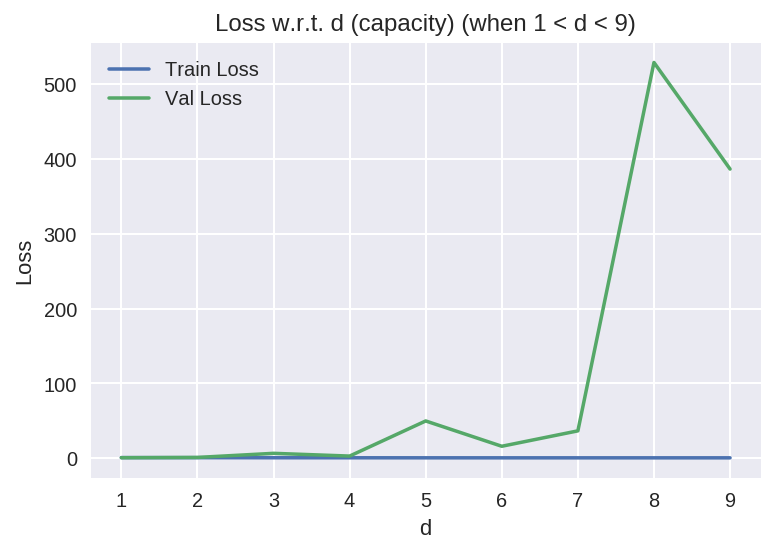

train_loss:  [0.9432 0.8737 0.7326 0.706  0.6569 0.6337 0.6301 0.6308 0.6296 0.6342
 0.6334 0.6407 0.6339 0.638 ]
val_loss:  [7.80700000e-01 1.16740000e+00 6.63960000e+00 2.97200000e+00
 4.98723000e+01 1.60791000e+01 3.66505000e+01 5.28557100e+02
 3.86231800e+02 9.14142980e+03 6.22009410e+03 4.30275518e+04
 1.93991227e+04 1.67611329e+05]


In [28]:
#plot Error
plot_error_loss(3,x[:9],train_error[:9],val_error[:9],'Train Error','Val Error','Error w.r.t. d (capacity) (when 1 < d < 9)','d','Error')

#display results for error
print("train_error (%): ",np.round(train_error,decimals=2))
print("val_error (%): ",np.round(val_error,decimals=2),end="\n\n")

#Exanding section of graph between 1<d<9
#plot Loss
plot_error_loss(4,x[:9],train_loss[:9],val_loss[:9],'Train Loss','Val Loss','Loss w.r.t. d (capacity) (when 1 < d < 9)','d','Loss')

#display results for loss
print("train_loss: ",np.round(train_loss,decimals=4))
print("val_loss: ",np.round(val_loss,decimals=4))

#### Adequacy of Learning Capacity 

From the exercise, we observed that using the training data set,  $d = 9$ produce the result with the least loss, as evidenced by the use of `np.argmin()`. Hence, this is the capacity which grants us the optimal amount of learning capacity for our training set.





In [29]:
print('Findings: minimum train_loss:',np.round(np.min(train_loss),decimals=4), "when d capacity is at", np.argmin(train_loss)+1)

Findings: minimum train_loss: 0.6296 when d capacity is at 9


#### Right-Fitting 


Ultimately, we wish to find a good balance between bias and variance - a model that well generalises the predictive model that we are trying to form. Although $d=9$ is the best learning capacity for our training set, we also note that while the training set has a loss of 0.6296 at $d=9$, the validation set as a loss of 386.23 at the similar capacity. Therefore, we would like to find the capacity at which the validation and training loss are both optimal, to ensure that the model can be generalised.

From the graph above, we observed difference in loss value between the training and the validation data sets is the least when $d = 2 $.

Hence, although we have established that $d = 9$ will produce a model with the maximum learning capacity, we should select $d = 2 $ so that balance between bias and variance is achieved. This is also consistent with our understanding that at a low capacity (high bias), there is no need to collect a lot of training data. The losses/errors can be high.

In [30]:
# The minimum train_loss is when d=1 however, we will exclude d=1 since train_loss > val_Loss 

diff = val_loss[:9] - train_loss[:9]
print('difference between train_loss and val_loss: ', np.round(diff,decimals=4),'\n')
print('Findings: minimum train_loss difference:',diff[1], "when d capacity is at", 2)

difference between train_loss and val_loss:  [-1.626000e-01  2.937000e-01  5.907000e+00  2.266000e+00  4.921530e+01
  1.544540e+01  3.602040e+01  5.279263e+02  3.856022e+02] 

Findings: minimum train_loss difference: 0.29371643971248096 when d capacity is at 2


To take stock of the current developments, the results is as below.

Next, we will be performing regularisation in a bid to improve the model.

In [31]:
d = 2
poly = PolynomialFeatures(d)

train_X = poly.fit_transform(n_train_data[:,0:3])
train_w_solution, train_loss_2 = compute_w_solution(train_X,train_y,0) 
train_error_2 = compute_error(train_X,train_w_solution,train_y)
    
val_X = poly.fit_transform(n_val_data[:,0:3])
val_error_2 = compute_error(val_X,train_w_solution,val_y)
val_loss_2 = loss_mse(train_w_solution,val_X,val_y,0)

print("optimal w at d=2:\n",train_w_solution,end="\n\n")

print("Error & Loss pre-regularisation: ")
print("train_error (%): ",train_error_2,"\ttrain_loss:",train_loss_2[0])
print("val_error (%):",val_error_2,"\t\tval_loss:",val_loss_2[0])

optimal w at d=2:
 [[ 0.47844463]
 [ 0.62580874]
 [ 0.17578504]
 [ 0.20301879]
 [-0.24835569]
 [-0.08412074]
 [-0.26620573]
 [-0.18913771]
 [-0.09064717]
 [-0.12833947]]

Error & Loss pre-regularisation: 
train_error (%):  62.745098039215684 	train_loss: [0.87372639]
val_error (%): 64.70588235294117 		val_loss: [1.16744283]


### Regularisation

Starting with a high-capacity predictive function, we gradually learn smoother, lower-capacity functions by reducing the values of some parameter weights of the predictive function.

Regularised Regression Loss $L(w)=\frac{1}{n}(Xw-y)^T(Xw-y)+\lambda w^Tw$.

From this process, we have observed that the most appropriate regularisation factor is $\lambda = 10^{-0.1} = 0.794$, and post-regularisation, the loss has decreased.


In [0]:
# this is to generate a list to 
# iterate through -10 to 10 at 0.1 intervals
def frange(start,stop,list_range):
  i = start
  while i<=stop:
      list_range.append(i)
      i += 0.1
      

list_range = []
frange(-10,10,list_range)

In [34]:
# use parameters in log base 10
reg = np.array(list_range,np.float32)
reg = 10**reg
list_reg = list(reg)

# use d=2, 'right-fit' capacity
d = 2
poly = PolynomialFeatures(d)

# assign actual y output
train_y = n_train_data[:,3][:,None] 
val_y = n_val_data[:,3][:,None]

# declare and initialise vectors to store data
r_train_error = np.zeros(len(list_reg))
r_val_error = np.zeros(len(list_reg))
r_train_loss = np.zeros(len(list_reg))
r_val_loss = np.zeros(len(list_reg))

# to find the error and loss for different regularisation parameters
for i,reg in enumerate(list_reg):
    
    train_X = poly.fit_transform(n_train_data[:,0:3]) 
    train_w_solution, r_train_loss[i] = compute_w_solution(train_X,train_y, reg)
    r_train_error[i] = compute_error(train_X,train_w_solution,train_y)
    
    val_X = poly.fit_transform(n_val_data[:,0:3])
    r_val_error[i] = compute_error(val_X,train_w_solution,val_y)
    r_val_loss[i] = loss_mse(train_w_solution,val_X,val_y,reg)
    
print("complete")


complete


<center>Additional: Plotting Graph for Error w.r.t regularisation

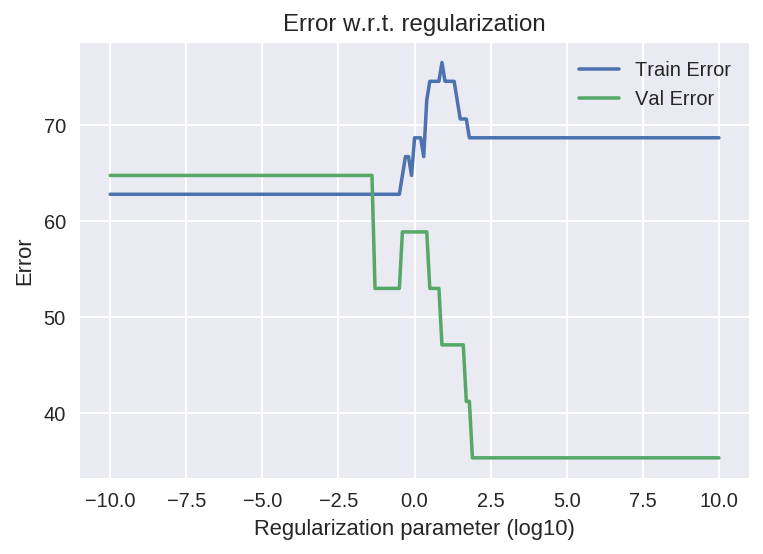

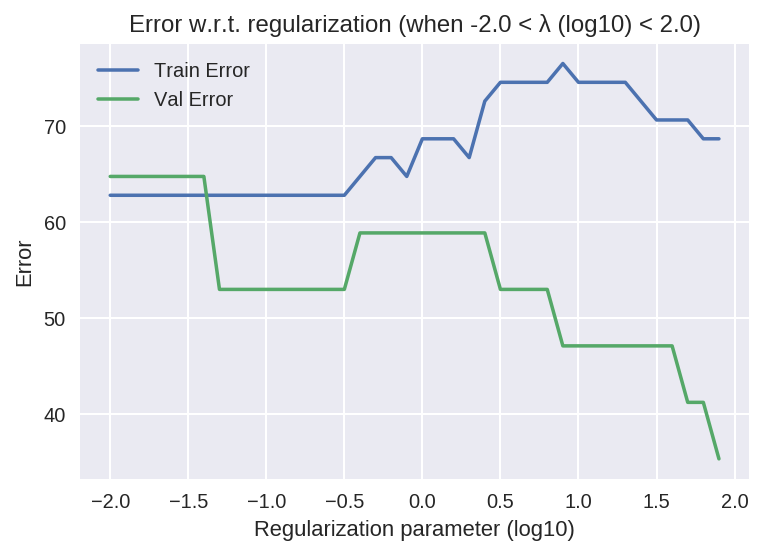

In [35]:
x = np.log10(list_reg)

# plot error
plot_error_loss(5,x,r_train_error,r_val_error,'Train Error','Val Error','Error w.r.t. regularization','Regularization parameter (log10)','Error')

#Exanding section of graph between -2.0 < λ (log10) < 2
# plot error 
plot_error_loss(6,x[80:120],r_train_error[80:120],r_val_error[80:120],'Train Error','Val Error','Error w.r.t. regularization (when -2.0 < λ (log10) < 2.0)','Regularization parameter (log10)','Error')

<center> Plotting Graph for Loss w.r.t regularisation

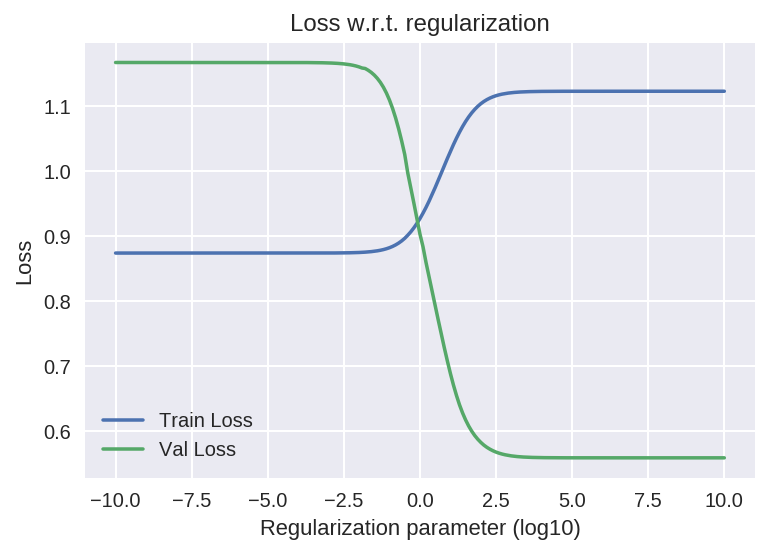

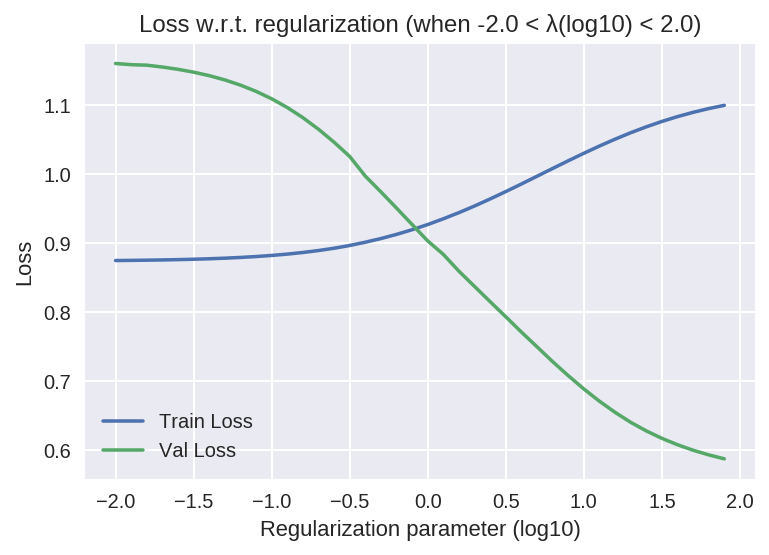

In [36]:
x = np.log10(list_reg)

# plot loss
plot_error_loss(7,x,r_train_loss,r_val_loss,'Train Loss','Val Loss','Loss w.r.t. regularization','Regularization parameter (log10)','Loss')

#Exanding section of graph between -2.0 < λ (log10) < 2
# plot loss
plot_error_loss(8,x[80:120],r_train_loss[80:120],r_val_loss[80:120],'Train Loss','Val Loss','Loss w.r.t. regularization (when -2.0 < λ(log10) < 2.0)','Regularization parameter (log10)','Loss')


### Post-Regularisation

We observe that previously, the loss was 0.88 and 1.17 for the training and validation sets respectively.

We look for the point where the difference betwene the loss for the training and loss is minimised.

Applying a weight on the loss - $L(w)=\frac{1}{n}(Xw-y)^T(Xw-y)+ 10^{-0.1} w^Tw$, we see that the loss is now amended to 0.9194 (training set) and 0.9268 (validation set).

In [37]:
# find the point at which the difference between
# train and val loss is the least, for the optimal regularisation parameter
idx = np.argmin(np.abs(r_train_loss-r_val_loss))

print("the loss (train, val) is ", np.round(r_train_loss[idx],decimals=4)," ",\
      np.round(r_val_loss[idx],decimals=4)," and the regularisation parameter is 10**",\
      np.round(x[idx],decimals=4),"=", list_reg[idx],sep="")


the loss (train, val) is 0.9194 0.9268 and the regularisation parameter is 10**-0.1=0.7943282


### Other Variations

To observe the effects and see if there are differences in the results we have previously obtained, we will try different variations in search for a better-performing model.

#### 1. Without Normalisation

This version uses the original data without normalisation. This is done as a comparison to determine if pre-normalisation would've helped developed a better model. The results subsequently illustrate that normalisation in the pre-processing stage is beneficial in that it develops a model which produces a lower loss.

We found that the optimal dimension to use is $d=2$, and the loss is 6.89 (training set) and 8.04 (validation set) respectively.

The optimal regularisation variable to use is  $\lambda = 10^{-0.5} = 0.3162$, and the loss is 7.25 (training set) and 6.67 (validation set) respectively.

Hence, we should continue to use normalised data since normalisation is able to produce better model with a much reduced loss.

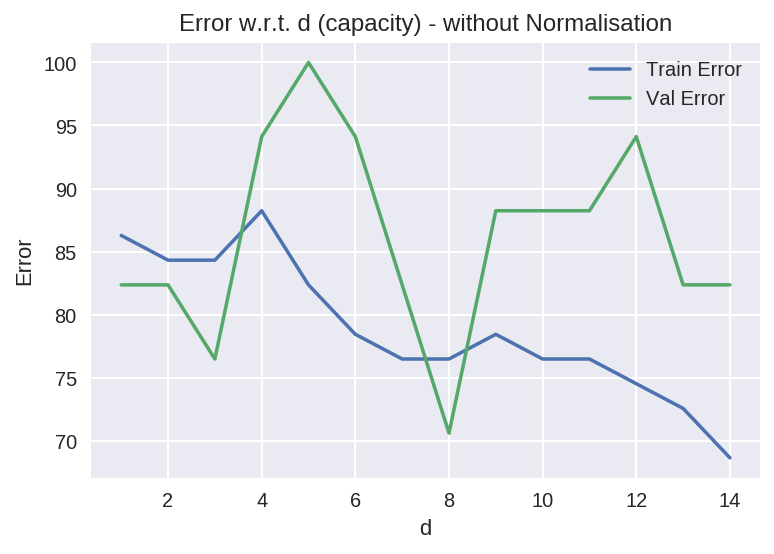

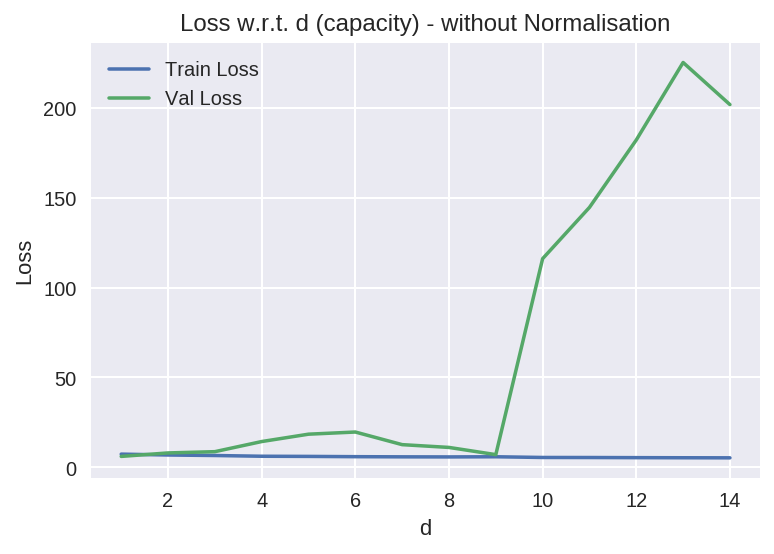

the loss (train, val) is 6.893 8.0409 and the optimal point is d=2


In [38]:
# list of values of the polynomial degree d
list_d = list(range(1,15))

# declare and initialise vectors to store data
train_error = np.zeros(len(list_d))
val_error = np.zeros(len(list_d))
train_loss = np.zeros(len(list_d))
val_loss = np.zeros(len(list_d))

# assign data for y (without normalisation)
train_y = train_data[:,3][:,None] 
val_y = val_data[:,3][:,None]

# iterate through the list to find the values of error and loss
for i,d in enumerate(list_d):
    
    poly = PolynomialFeatures(d)
    
    train_X = poly.fit_transform(train_data[:,0:3])
    train_w_solution, train_loss[i] = compute_w_solution(train_X,train_y,0) 
    train_error[i] = compute_error(train_X,train_w_solution,train_y)
    
    val_X = poly.fit_transform(val_data[:,0:3])
    val_error[i] = compute_error(val_X,train_w_solution,val_y)
    val_loss[i] = loss_mse(train_w_solution,val_X,val_y,0)

  
#plot error
x = list_d
plot_error_loss(9,x,train_error,val_error,'Train Error','Val Error','Error w.r.t. d (capacity) - without Normalisation','d','Error')

#plot loss
plot_error_loss(10,x,train_loss,val_loss,'Train Loss','Val Loss','Loss w.r.t. d (capacity) - without Normalisation','d','Loss')

# find the point at which the difference between
# train and val loss is the least, for the optimal capacity
idx = np.argmin(np.abs(train_loss-val_loss))

print("the loss (train, val) is ", np.round(train_loss[idx],decimals=4)," ",\
      np.round(val_loss[idx],decimals=4)," and the optimal point is d=",idx+1,sep="")

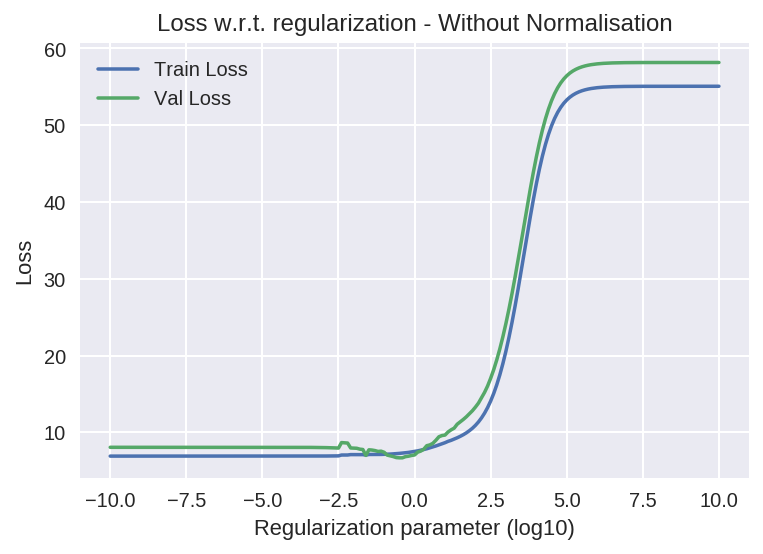

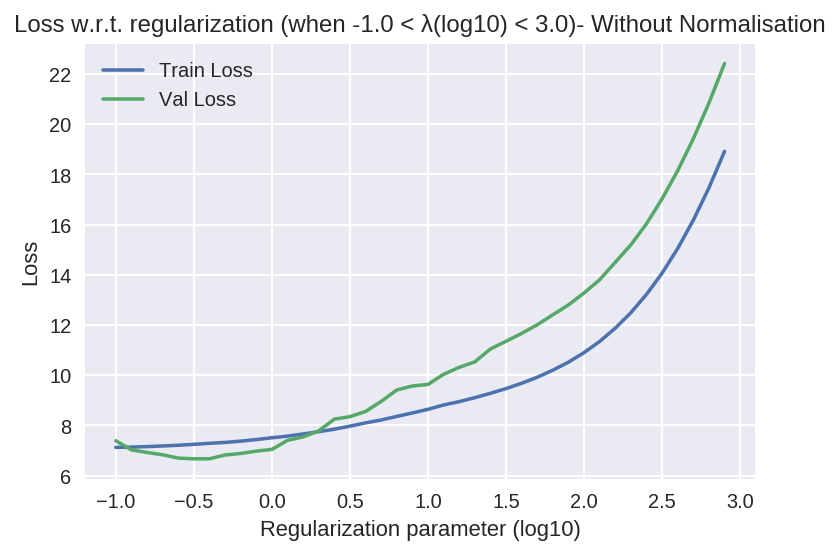

In [39]:
# prepare the list for regularisation
reg = np.array(list_range,np.float32)
reg = 10**reg
list_reg = list(reg)

# from above, d=2 is the optimal capacity
d = 2
poly = PolynomialFeatures(d)

# assign the values of y
train_y = train_data[:,3][:,None] 
val_y = val_data[:,3][:,None]

# declare and initialise vectors to store data
r_train_error = np.zeros(len(list_reg))
r_val_error = np.zeros(len(list_reg))
r_train_loss = np.zeros(len(list_reg))
r_val_loss = np.zeros(len(list_reg))

# to find the loss for different regularisation parameters
for i,reg in enumerate(list_reg):
    
    train_X = poly.fit_transform(train_data[:,0:3]) 
    train_w_solution, r_train_loss[i] = compute_w_solution(train_X,train_y, reg)
    r_train_error[i] = compute_error(train_X,train_w_solution,train_y)
    
    val_X = poly.fit_transform(val_data[:,0:3])
    r_val_error[i] = compute_error(val_X,train_w_solution,val_y)
    r_val_loss[i] = loss_mse(train_w_solution,val_X,val_y,reg)
    
x = np.log10(list_reg)

# plot loss
plot_error_loss(15,x,r_train_loss,r_val_loss,'Train Loss','Val Loss','Loss w.r.t. regularization - Without Normalisation','Regularization parameter (log10)','Loss')

#Exanding section of graph between -1.0 < λ (log10) < 3
# plot loss
plot_error_loss(16,x[90:130],r_train_loss[90:130],r_val_loss[90:130],'Train Loss','Val Loss','Loss w.r.t. regularization (when -1.0 < λ(log10) < 3.0)- Without Normalisation','Regularization parameter (log10)','Loss')



In [40]:
# from visual inference, the optimal regularisation parameter is found at -0.5
for i in range(201):
    if(x[i]==-0.5):
        idx=i

print("the loss (train, val) is ", np.round(r_train_loss[idx],decimals=4)," ",\
      np.round(r_val_loss[idx],decimals=4)," and the regularisation parameter is 10**",\
      np.round(x[idx],decimals=4),"=", list_reg[idx],sep="")

the loss (train, val) is 7.2467 6.669 and the regularisation parameter is 10**-0.5=0.31622776


#### 2. Selection of data features (with Normalisation)
Earlier, we found that the with normalisation of data, our model performs better since loss of model is reduced. We also inferred that regularisation has the general effect of finding the balance point for loss, therefore, we will continue applying this in subsequent sections.

Hence we will continue to use the normalised data set for the later part of this section.

##### 2a. Removing Feature 1: Number of Times Met Per Week
This version removes feature 1.

We found that the optimal dimension to use is $d=3$, and the loss is 0.99 (training set) and 1.25 (validation set) respectively.

The optimal regularisation variable to use is $\lambda =10^{-0.4}$, and the loss is 1.00 (training set) and 1.01 (validation set) respectively.



In [41]:
print("normalized_data:")
print(normalized_data[:5,],end="\n\n")

#Removing Feature 1
data_f1_removed = np.delete(normalized_data,0, axis=1)
print("normalized_data with feature 1 removed:")
print(data_f1_removed[:5,],end="\n\n")

f1_train_data = data_f1_removed[:51,:]
f1_val_data = data_f1_removed[51:68,:]
f1_test_data = data_f1_removed[68:86,:] 


normalized_data:
[[-0.95444862 -1.1257407  -1.01489217 -1.73289835]
 [-0.95444862  1.17999327  0.4724498   1.12722514]
 [-0.95444862  0.02712628  0.4724498   1.12722514]
 [-0.19883112 -1.1257407   0.4724498   1.12722514]
 [-0.95444862  0.02712628  0.4724498  -2.09041379]]

normalized_data with feature 1 removed:
[[-1.1257407  -1.01489217 -1.73289835]
 [ 1.17999327  0.4724498   1.12722514]
 [ 0.02712628  0.4724498   1.12722514]
 [-1.1257407   0.4724498   1.12722514]
 [ 0.02712628  0.4724498  -2.09041379]]



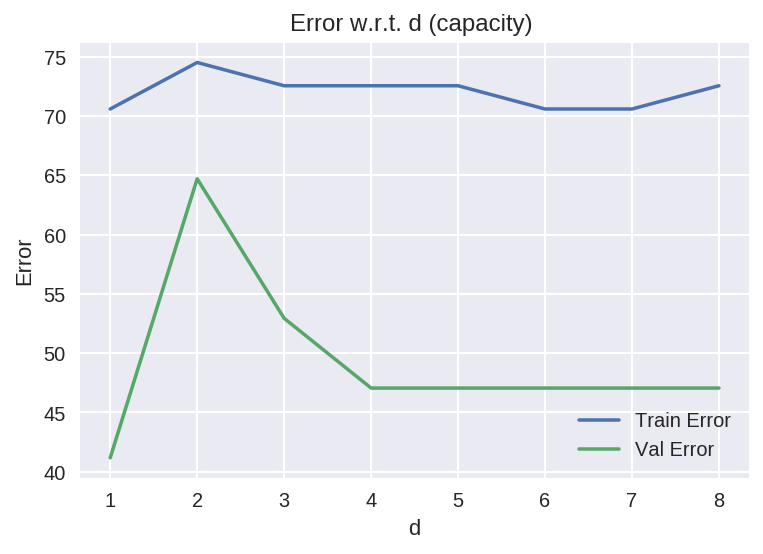

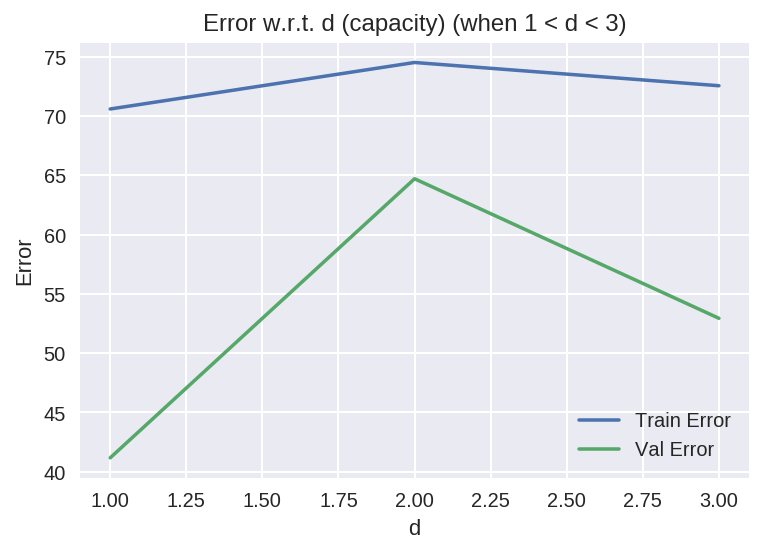

train_error:  [70.59 74.51 72.55 72.55 72.55 70.59 70.59 72.55]
val_error:  [41.18 64.71 52.94 47.06 47.06 47.06 47.06 47.06]



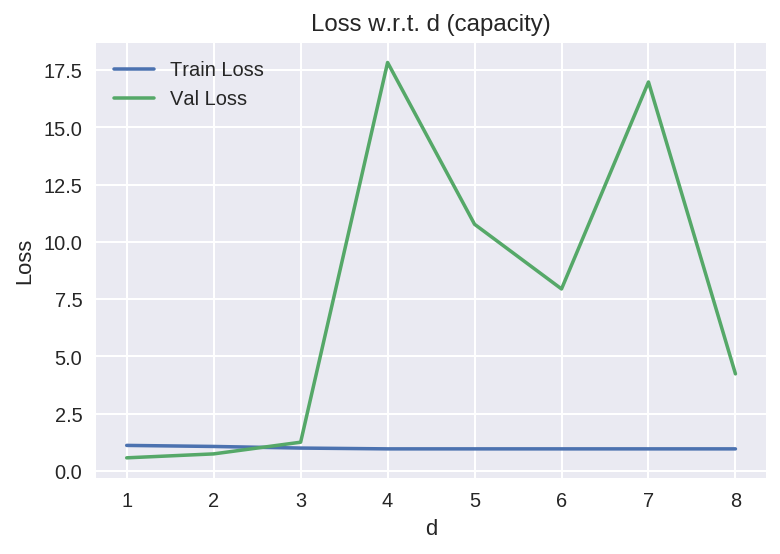

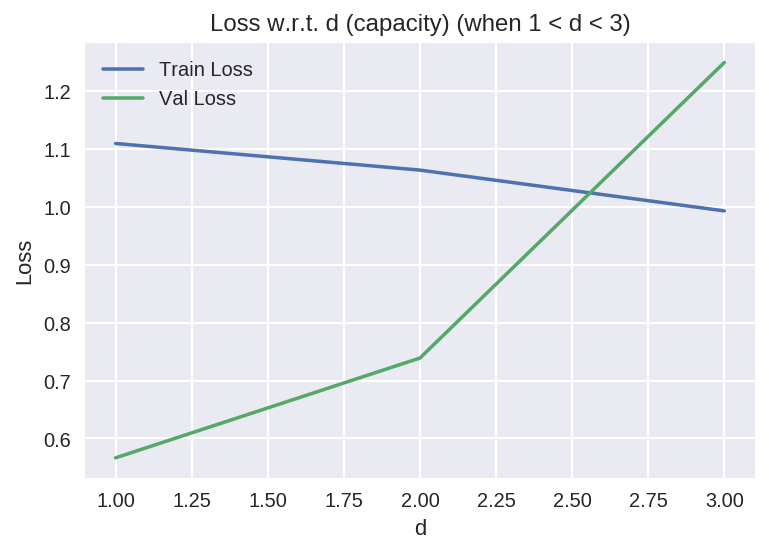

train_loss:  [1.11 1.06 0.99 0.96 0.96 0.96 0.96 0.96]
val_loss:  [ 0.57  0.74  1.25 17.83 10.77  7.94 16.98  4.23]
the loss (train, val) is 0.9929 1.2491 and the optimal point is d=3


In [42]:
# List of values of the polynomial degree d
list_d = list(range(1,9))

# declare and initialise vectors to store data
train_error = np.zeros(len(list_d))
val_error = np.zeros(len(list_d))
train_loss = np.zeros(len(list_d))
val_loss = np.zeros(len(list_d))

# assign data for y (normalised)
train_y = f1_train_data[:,2][:,None] 
val_y = f1_val_data[:,2][:,None]

# iterate through the list to find the values of error and loss
for i,d in enumerate(list_d):
    
    poly = PolynomialFeatures(d)
    
    train_X = poly.fit_transform(f1_train_data[:,0:2])
    train_w_solution, train_loss[i] = compute_w_solution(train_X,train_y,0) 
    train_error[i] = compute_error(train_X,train_w_solution,train_y)
    
    val_X = poly.fit_transform(f1_val_data[:,0:2])
    val_error[i] = compute_error(val_X,train_w_solution,val_y)
    val_loss[i] = loss_mse(train_w_solution,val_X,val_y,0)

  
#plot error
x = list_d
plot_error_loss(17,x,train_error,val_error,'Train Error','Val Error','Error w.r.t. d (capacity) ','d','Error')

#Exanding section of graph between 1<d<3
#plot error
x = list_d
plot_error_loss(18,x[:3],train_error[:3],val_error[:3],'Train Error','Val Error','Error w.r.t. d (capacity) (when 1 < d < 3)','d','Error')

print("train_error: ",np.round(train_error,decimals=2))
print("val_error: ",np.round(val_error,decimals=2),end="\n\n")

#plot loss
plot_error_loss(19,x,train_loss,val_loss,'Train Loss','Val Loss','Loss w.r.t. d (capacity)','d','Loss')

#Exanding section of graph between 1<d<3
#plot loss
plot_error_loss(20,x[:3],train_loss[:3],val_loss[:3],'Train Loss','Val Loss','Loss w.r.t. d (capacity) (when 1 < d < 3)','d','Loss')

print("train_loss: ",np.round(train_loss,decimals=2))
print("val_loss: ",np.round(val_loss,decimals=2))

# find the point at which the difference between
# train and val loss is the least, for the optimal capacity
idx = np.argmin(np.abs(train_loss-val_loss))

print("the loss (train, val) is ", np.round(train_loss[idx],decimals=4)," ",\
      np.round(val_loss[idx],decimals=4)," and the optimal point is d=",idx+1,sep="")

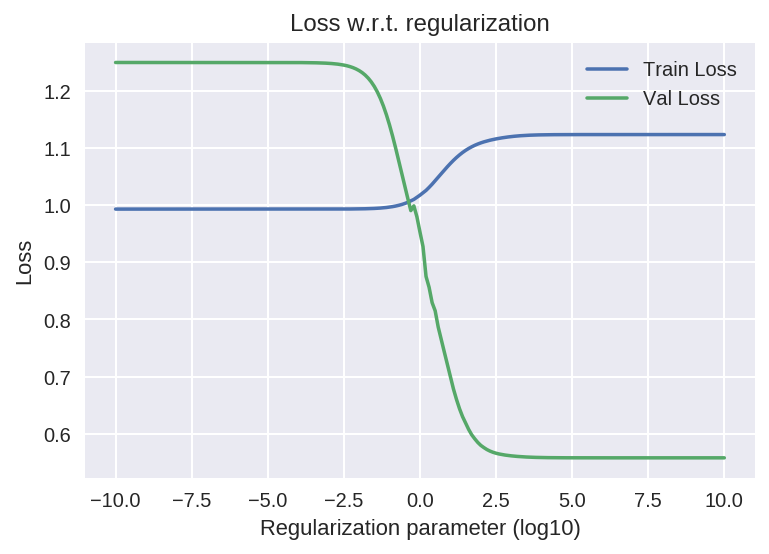

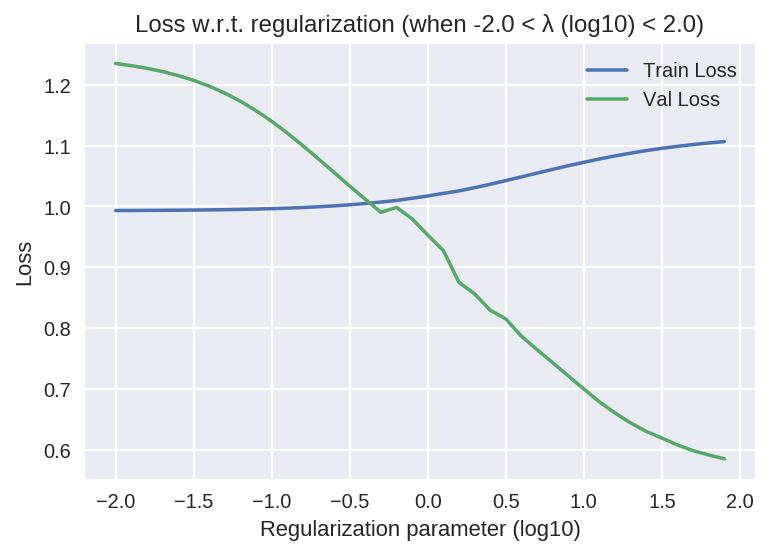

the loss (train, val) is 1.0047 1.0116 and the regularisation parameter is 10**-0.4=0.39810717


In [43]:
reg = np.array(list_range,np.float32)
reg = 10**reg
list_reg = list(reg)

# use d=3, 'right-fit' capacity
d = 3
poly = PolynomialFeatures(d)

# assign actual y output
train_y = f1_train_data[:,2][:,None] 
val_y = f1_val_data[:,2][:,None]

# declare and initialise vectors to store data
r_train_error = np.zeros(len(list_reg))
r_val_error = np.zeros(len(list_reg))
r_train_loss = np.zeros(len(list_reg))
r_val_loss = np.zeros(len(list_reg))

# to find the error and loss for different regularisation parameters
for i,reg in enumerate(list_reg):
    
    train_X = poly.fit_transform(f1_train_data[:,0:2]) 
    train_w_solution, r_train_loss[i] = compute_w_solution(train_X,train_y, reg)
    r_train_error[i] = compute_error(train_X,train_w_solution,train_y)
    
    val_X = poly.fit_transform(f1_val_data[:,0:2])
    r_val_error[i] = compute_error(val_X,train_w_solution,val_y)
    r_val_loss[i] = loss_mse(train_w_solution,val_X,val_y,reg)
    
x = np.log10(list_reg)

# plot loss
plot_error_loss(15,x,r_train_loss,r_val_loss,'Train Loss','Val Loss','Loss w.r.t. regularization','Regularization parameter (log10)','Loss')

# plot loss
plot_error_loss(16,x[80:120],r_train_loss[80:120],r_val_loss[80:120],'Train Loss','Val Loss','Loss w.r.t. regularization (when -2.0 < λ (log10) < 2.0)','Regularization parameter (log10)','Loss')

# find the point at which the difference between
# train and val loss is the least, for the optimal regularisation parameter
idx = np.argmin(np.abs(r_train_loss-r_val_loss))

print("the loss (train, val) is ", np.round(r_train_loss[idx],decimals=4)," ",\
      np.round(r_val_loss[idx],decimals=4)," and the regularisation parameter is 10**",\
      np.round(x[idx],decimals=4),"=", list_reg[idx],sep="")

##### 2b. Removing Feature 2: Expectation of friendship
This version removes feature 2.

We found that the optimal dimension to use is $d=2$, and the loss is 0.91 (training set) and 1.01 (validation set) respectively.

The optimal regularisation variable to use is $\lambda =10^{-0.5}$, and the loss is 0.94 (training set) and 0.94 (validation set) respectively.

In [44]:
#Removing Feature 2
data_f2_removed = np.delete(normalized_data,1, axis=1)
print("normalized_data with feature 2 removed:")
print(data_f2_removed[:5,], end="\n\n")

f2_train_data = data_f2_removed[:51,:]
f2_val_data = data_f2_removed[51:68,:]
f2_test_data = data_f2_removed[68:86,:] 

normalized_data with feature 2 removed:
[[-0.95444862 -1.01489217 -1.73289835]
 [-0.95444862  0.4724498   1.12722514]
 [-0.95444862  0.4724498   1.12722514]
 [-0.19883112  0.4724498   1.12722514]
 [-0.95444862  0.4724498  -2.09041379]]



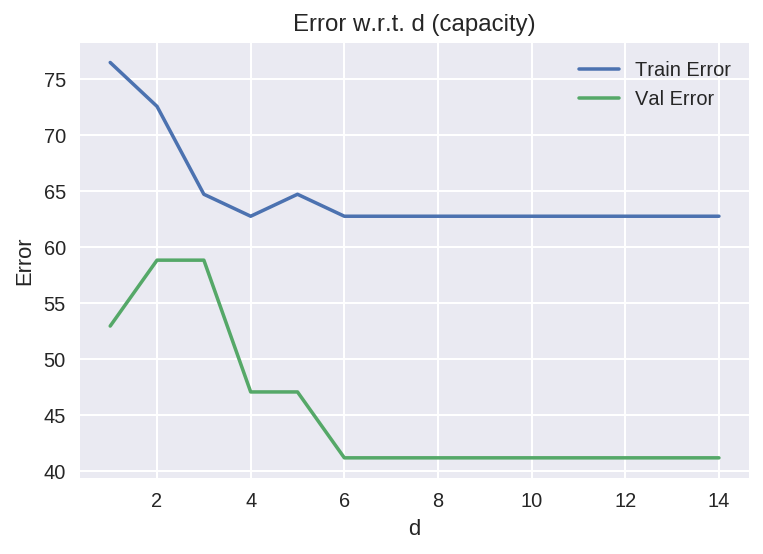

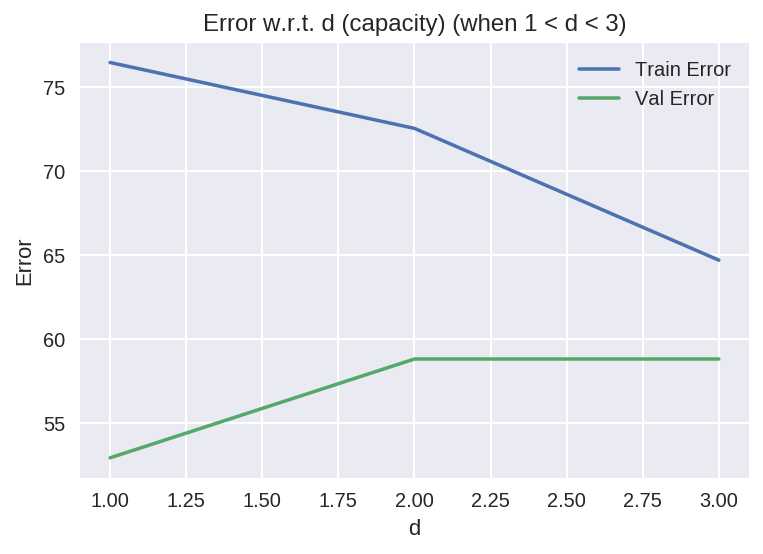

train_error:  [76.47 72.55 64.71 62.75 64.71 62.75 62.75 62.75 62.75 62.75 62.75 62.75
 62.75 62.75]
val_error:  [52.94 58.82 58.82 47.06 47.06 41.18 41.18 41.18 41.18 41.18 41.18 41.18
 41.18 41.18]



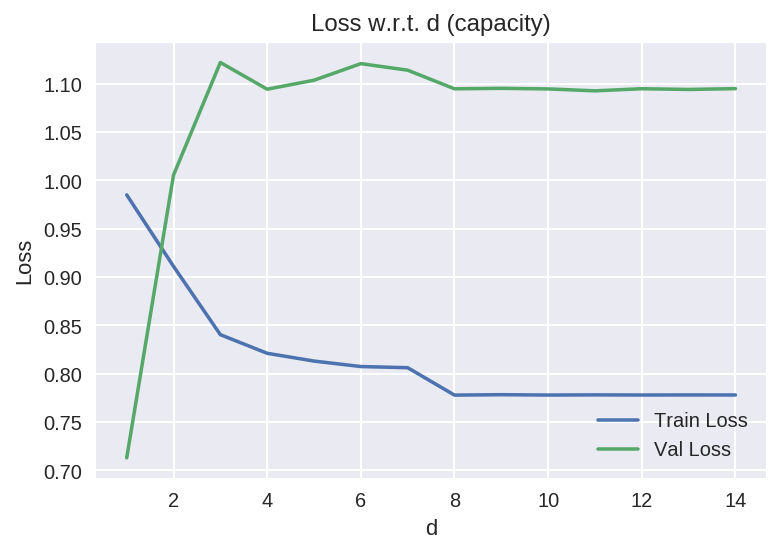

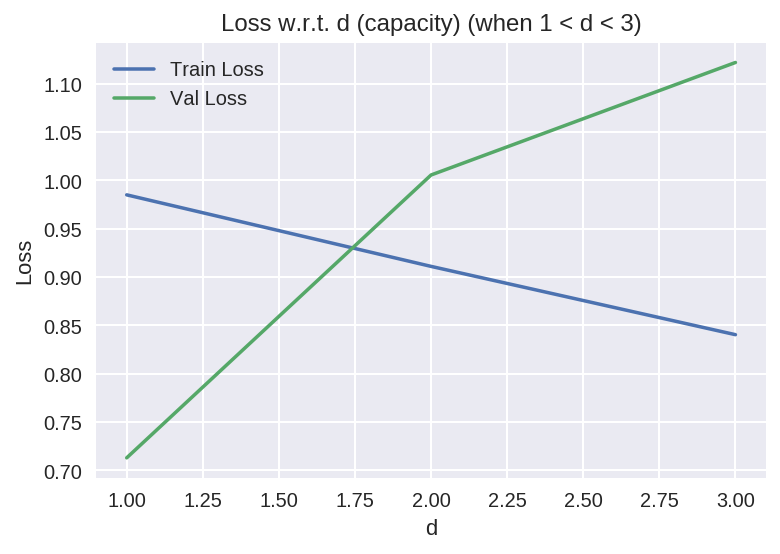

train_loss:  [0.99 0.91 0.84 0.82 0.81 0.81 0.81 0.78 0.78 0.78 0.78 0.78 0.78 0.78]
val_loss:  [0.71 1.01 1.12 1.09 1.1  1.12 1.11 1.09 1.1  1.09 1.09 1.09 1.09 1.09]
the loss (train, val) is 0.9111 1.0056 and the optimal point is d=2


In [45]:
# List of values of the polynomial degree d
list_d = list(range(1,15))

# declare and initialise vectors to store data
train_error = np.zeros(len(list_d))
val_error = np.zeros(len(list_d))
train_loss = np.zeros(len(list_d))
val_loss = np.zeros(len(list_d))

# assign data for y (normalised)
train_y = f2_train_data[:,2][:,None] 
val_y = f2_val_data[:,2][:,None]

# iterate through the list to find the values of error and loss
for i,d in enumerate(list_d):
    
    poly = PolynomialFeatures(d)
    
    train_X = poly.fit_transform(f2_train_data[:,0:2])
    train_w_solution, train_loss[i] = compute_w_solution(train_X,train_y,0) 
    train_error[i] = compute_error(train_X,train_w_solution,train_y)
    
    val_X = poly.fit_transform(f2_val_data[:,0:2])
    val_error[i] = compute_error(val_X,train_w_solution,val_y)
    val_loss[i] = loss_mse(train_w_solution,val_X,val_y,0)

  
#plot error
x = list_d
plot_error_loss(17,x,train_error,val_error,'Train Error','Val Error','Error w.r.t. d (capacity)','d','Error')

#Exanding section of graph between 1<d<3
#plot error 
x = list_d
plot_error_loss(18,x[:3],train_error[:3],val_error[:3],'Train Error','Val Error','Error w.r.t. d (capacity) (when 1 < d < 3)','d','Error')

print("train_error: ",np.round(train_error,decimals=2))
print("val_error: ",np.round(val_error,decimals=2),end="\n\n")

#plot loss
plot_error_loss(19,x,train_loss,val_loss,'Train Loss','Val Loss','Loss w.r.t. d (capacity)','d','Loss')

#Exanding section of graph between 1<d<3
#plot loss
plot_error_loss(20,x[:3],train_loss[:3],val_loss[:3],'Train Loss','Val Loss','Loss w.r.t. d (capacity) (when 1 < d < 3)','d','Loss')

print("train_loss: ",np.round(train_loss,decimals=2))
print("val_loss: ",np.round(val_loss,decimals=2))

# find the point at which the difference between
# train and val loss is the least, for the optimal capacity
idx = np.argmin(np.abs(train_loss-val_loss))

print("the loss (train, val) is ", np.round(train_loss[idx],decimals=4)," ",\
      np.round(val_loss[idx],decimals=4)," and the optimal point is d=",idx+1,sep="")

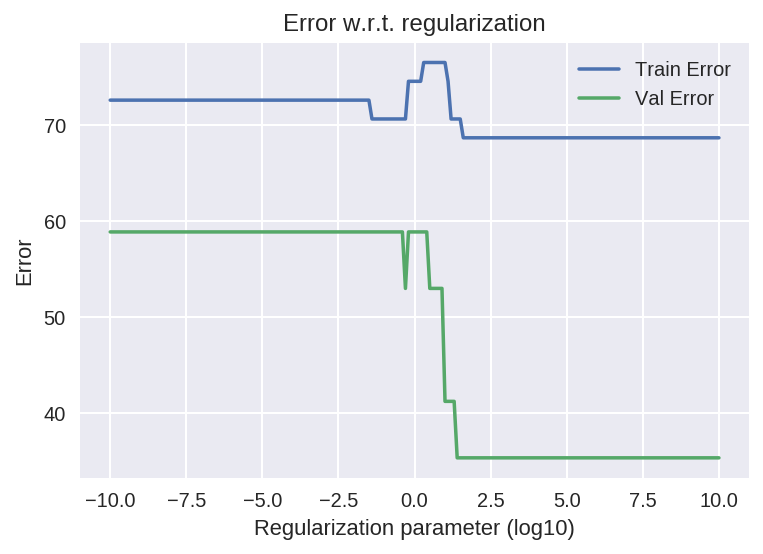

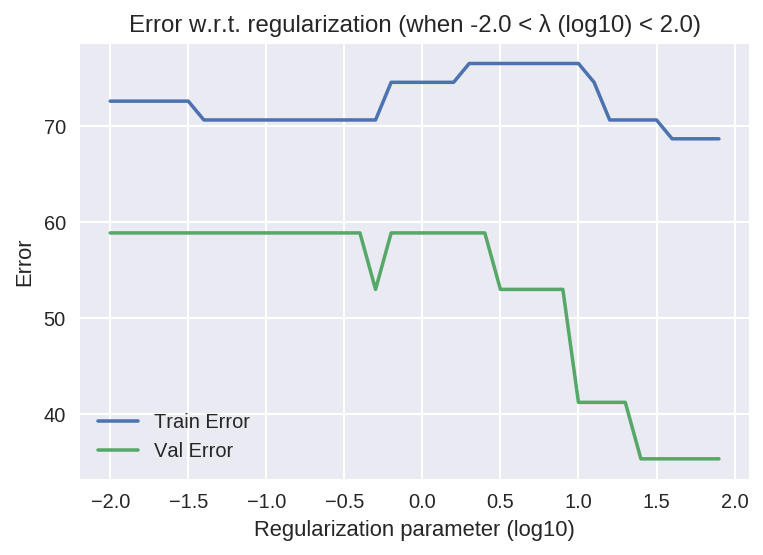

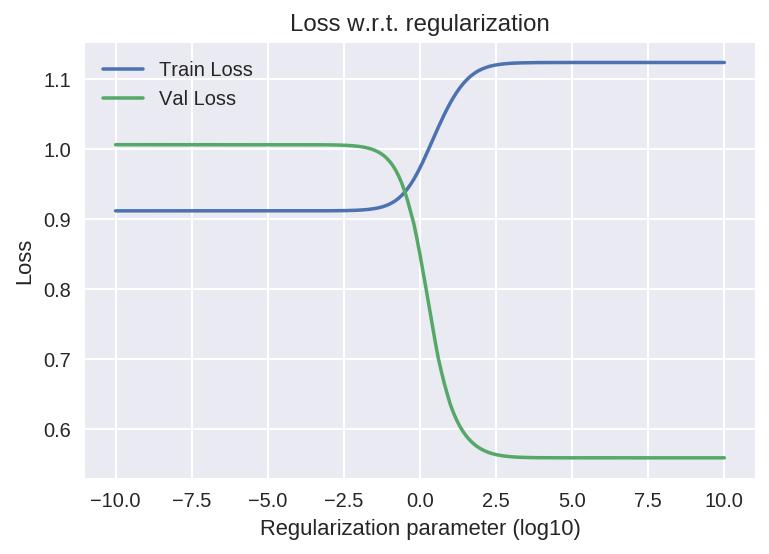

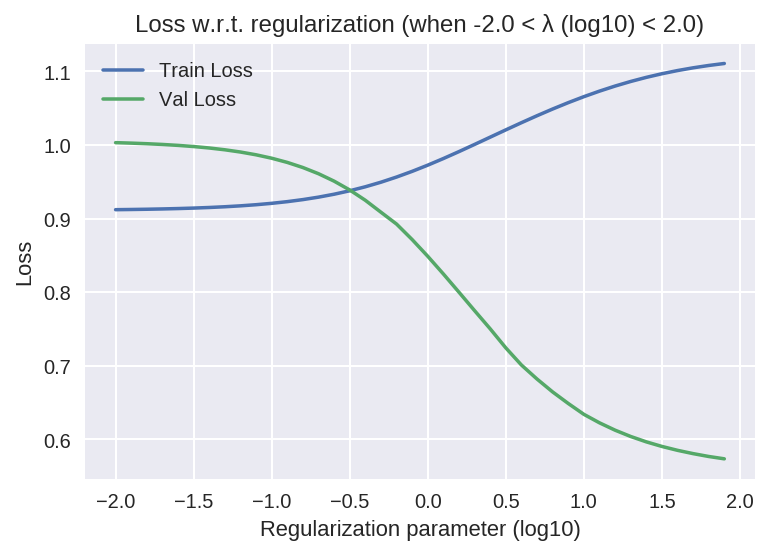

the loss (train, val) is 0.9378 0.9389 and the regularisation parameter is 10**-0.5=0.31622776


In [46]:
reg = np.array(list_range,np.float32)
reg = 10**reg
list_reg = list(reg)

# use d=2, 'right-fit' capacity
d = 2 
poly = PolynomialFeatures(d)

# assign actual y output
train_y = f2_train_data[:,2][:,None] 
val_y = f2_val_data[:,2][:,None]

# declare and initialise vectors to store data
r_train_error = np.zeros(len(list_reg))
r_val_error = np.zeros(len(list_reg))
r_train_loss = np.zeros(len(list_reg))
r_val_loss = np.zeros(len(list_reg))

# to find the error and loss for different regularisation parameters
for i,reg in enumerate(list_reg):
    
    train_X = poly.fit_transform(f2_train_data[:,0:2]) 
    train_w_solution, r_train_loss[i] = compute_w_solution(train_X,train_y, reg)
    r_train_error[i] = compute_error(train_X,train_w_solution,train_y)
    
    val_X = poly.fit_transform(f2_val_data[:,0:2])
    r_val_error[i] = compute_error(val_X,train_w_solution,val_y)
    r_val_loss[i] = loss_mse(train_w_solution,val_X,val_y,reg)
    
x = np.log10(list_reg)

# plot error
plot_error_loss(13,x,r_train_error,r_val_error,'Train Error','Val Error','Error w.r.t. regularization','Regularization parameter (log10)','Error')

#Exanding section of graph between -2.0 < λ (log10) < 2
# plot error
plot_error_loss(14,x[80:120],r_train_error[80:120],r_val_error[80:120],'Train Error','Val Error','Error w.r.t. regularization (when -2.0 < λ (log10) < 2.0)','Regularization parameter (log10)','Error')

# plot error
plot_error_loss(15,x,r_train_loss,r_val_loss,'Train Loss','Val Loss','Loss w.r.t. regularization','Regularization parameter (log10)','Loss')

#Exanding section of graph between -2.0 < λ (log10) < 2
# plot error
plot_error_loss(16,x[80:120],r_train_loss[80:120],r_val_loss[80:120],'Train Loss','Val Loss','Loss w.r.t. regularization (when -2.0 < λ (log10) < 2.0)','Regularization parameter (log10)','Loss')

# find the point at which the difference between
# train and val loss is the least, for the optimal regularisation parameter
idx = np.argmin(np.abs(r_train_loss-r_val_loss))

print("the loss (train, val) is ", np.round(r_train_loss[idx],decimals=4)," ",\
      np.round(r_val_loss[idx],decimals=4)," and the regularisation parameter is 10**",\
      np.round(x[idx],decimals=4),"=", list_reg[idx],sep="")

##### 2c. Removing Feature 3: Year of Study
This version removes feature 3.

We found that the optimal dimension to use is $d=2$, and the loss is 0.94 (training set) and 0.81 (validation set) respectively.

The optimal regularisation variable to use is $\lambda =10^{0}$, and the loss is 0.98 (training set) and 0.68 (validation set) respectively.



In [47]:
#Removing Feature 3
data_f3_removed = np.delete(normalized_data,2, axis=1)
print("normalized_data with feature 3 removed:")
print(data_f3_removed[:5,])

f3_train_data = data_f3_removed[:51,:]
f3_val_data = data_f3_removed[51:68,:]
f3_test_data = data_f3_removed[68:86,:] 

normalized_data with feature 3 removed:
[[-0.95444862 -1.1257407  -1.73289835]
 [-0.95444862  1.17999327  1.12722514]
 [-0.95444862  0.02712628  1.12722514]
 [-0.19883112 -1.1257407   1.12722514]
 [-0.95444862  0.02712628 -2.09041379]]


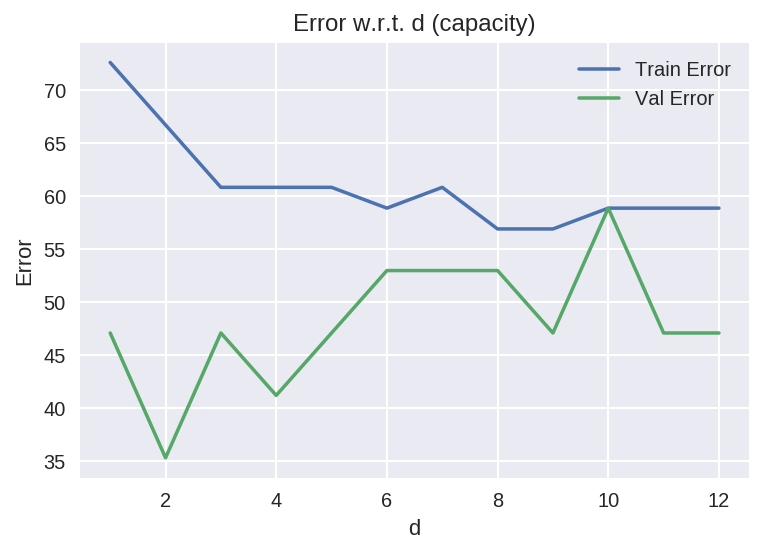

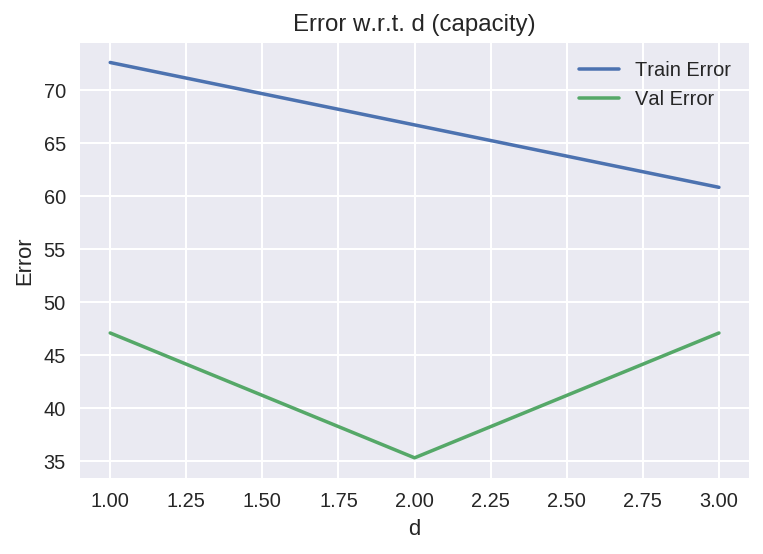

train_error:  [72.55 66.67 60.78 60.78 60.78 58.82 60.78 56.86 56.86 58.82 58.82 58.82]
val_error:  [47.06 35.29 47.06 41.18 47.06 52.94 52.94 52.94 47.06 58.82 47.06 47.06]



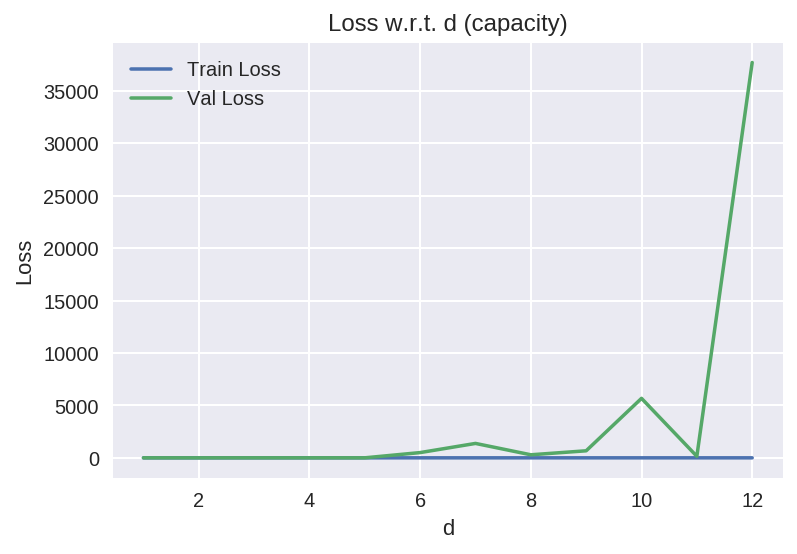

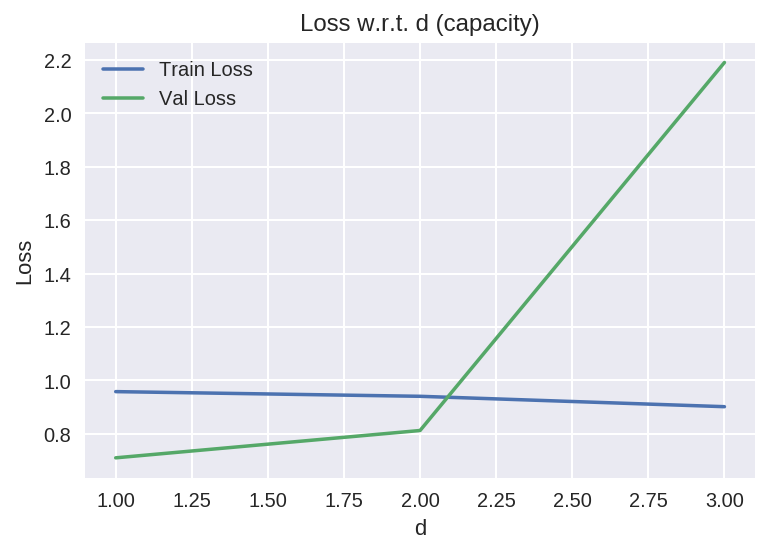

train_loss:  [0.96 0.94 0.9  0.9  0.9  0.83 0.8  0.79 0.78 0.79 0.79 0.79]
val_loss:  [7.100000e-01 8.100000e-01 2.190000e+00 2.080000e+00 2.410000e+00
 5.011400e+02 1.375040e+03 2.911700e+02 6.721000e+02 5.672760e+03
 1.479700e+02 3.770788e+04]
the loss (train, val) is 0.9403 0.8122 and the optimal point is d=2


In [48]:
# List of values of the polynomial degree d
list_d = list(range(1,13))

# declare and initialise vectors to store data
train_error = np.zeros(len(list_d))
val_error = np.zeros(len(list_d))
train_loss = np.zeros(len(list_d))
val_loss = np.zeros(len(list_d))

# assign data for y (normalised)
train_y = f3_train_data[:,2][:,None] 
val_y = f3_val_data[:,2][:,None]

# iterate through the list to find the values of error and loss
for i,d in enumerate(list_d):
    
    poly = PolynomialFeatures(d)
    
    train_X = poly.fit_transform(f3_train_data[:,0:2])
    train_w_solution, train_loss[i] = compute_w_solution(train_X,train_y,0) 
    train_error[i] = compute_error(train_X,train_w_solution,train_y)
    
    val_X = poly.fit_transform(f3_val_data[:,0:2])
    val_error[i] = compute_error(val_X,train_w_solution,val_y)
    val_loss[i] = loss_mse(train_w_solution,val_X,val_y,0)

#plot error
x = list_d
plot_error_loss(17,x,train_error,val_error,'Train Error','Val Error','Error w.r.t. d (capacity)','d','Error')

#Exanding section of graph between 1<d<3
#plot error
x = list_d
plot_error_loss(18,x[:3],train_error[:3],val_error[:3],'Train Error','Val Error','Error w.r.t. d (capacity)','d','Error')

#display results for error
print("train_error: ",np.round(train_error,decimals=2))
print("val_error: ",np.round(val_error,decimals=2),end="\n\n")

#plot loss
plot_error_loss(19,x,train_loss,val_loss,'Train Loss','Val Loss','Loss w.r.t. d (capacity)','d','Loss')

#Exanding section of graph between 1<d<3
#plot loss
plot_error_loss(20,x[:3],train_loss[:3],val_loss[:3],'Train Loss','Val Loss','Loss w.r.t. d (capacity)','d','Loss')

#display results for loss
print("train_loss: ",np.round(train_loss,decimals=2))
print("val_loss: ",np.round(val_loss,decimals=2))

# find the point at which the difference between
# train and val loss is the least, for the optimal capacity
idx = np.argmin(np.abs(train_loss-val_loss))

print("the loss (train, val) is ", np.round(train_loss[idx],decimals=4)," ",\
      np.round(val_loss[idx],decimals=4)," and the optimal point is d=",idx+1,sep="")

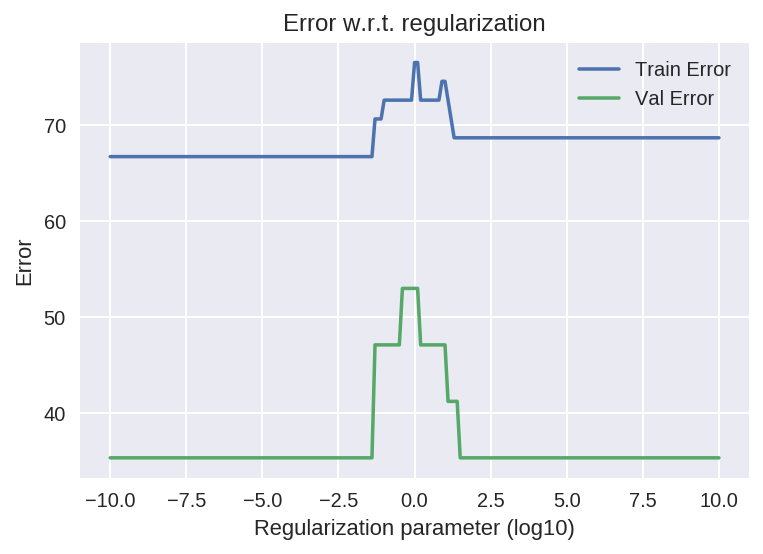

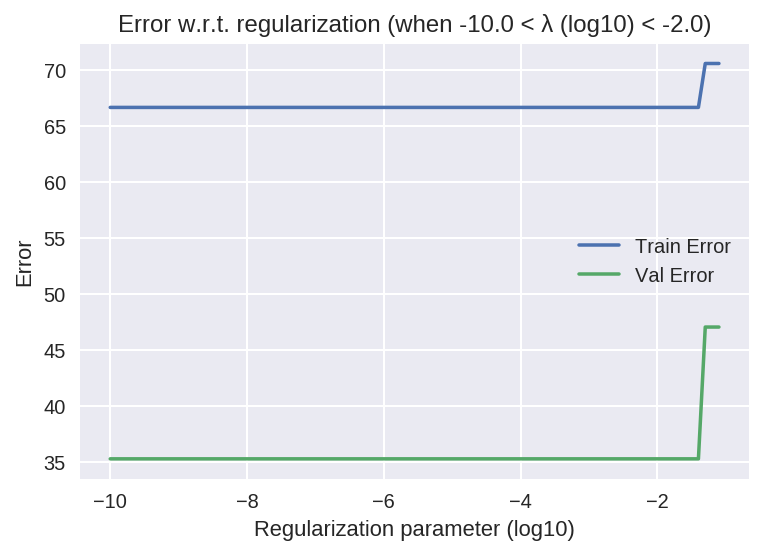

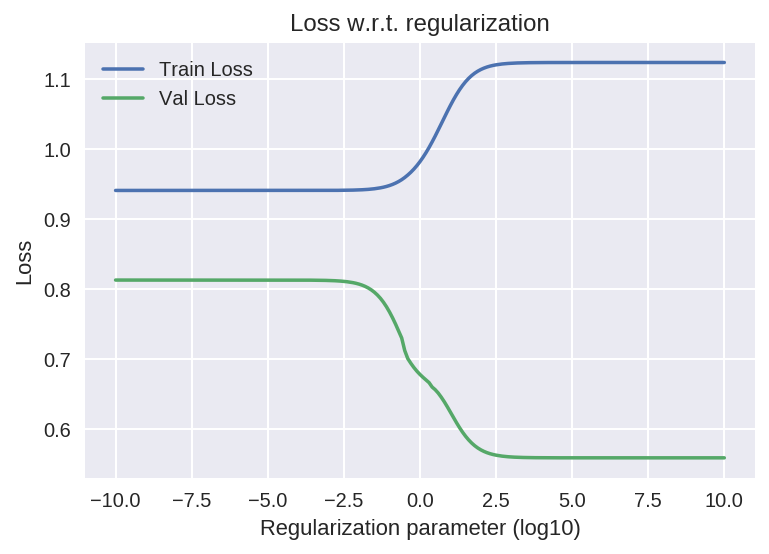

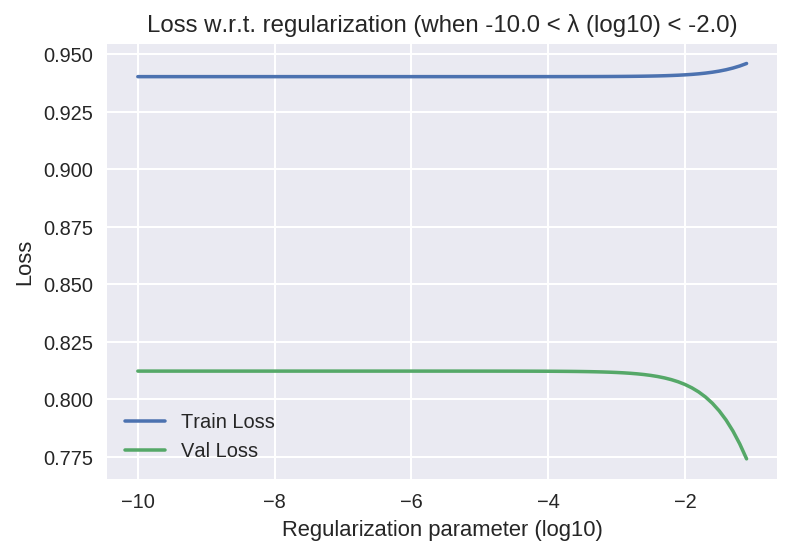

the loss (train, val) is 0.9814 0.6773 and the regularisation parameter is 10**0.0=1.0


In [49]:
reg = np.array(list_range,np.float32)
reg = 10**reg
list_reg = list(reg)

# use d=2, 'right-fit' capacity
d = 2  
poly = PolynomialFeatures(d)

# assign actual y output
train_y = f3_train_data[:,2][:,None] 
val_y = f3_val_data[:,2][:,None]

# declare and initialise vectors to store data
r_train_error = np.zeros(len(list_reg))
r_val_error = np.zeros(len(list_reg))
r_train_loss = np.zeros(len(list_reg))
r_val_loss = np.zeros(len(list_reg))

# to find the error and loss for different regularisation parameters
for i,reg in enumerate(list_reg):
    
    train_X = poly.fit_transform(f3_train_data[:,0:2]) 
    train_w_solution, r_train_loss[i] = compute_w_solution(train_X,train_y, reg)
    r_train_error[i] = compute_error(train_X,train_w_solution,train_y)
    
    val_X = poly.fit_transform(f3_val_data[:,0:2])
    r_val_error[i] = compute_error(val_X,train_w_solution,val_y)
    r_val_loss[i] = loss_mse(train_w_solution,val_X,val_y,reg)
    
x = np.log10(list_reg)

# plot error
plot_error_loss(13,x,r_train_error,r_val_error,'Train Error','Val Error','Error w.r.t. regularization','Regularization parameter (log10)','Error')

#Exanding section of graph between -10.0 < λ (log10) < -2.0
# plot error
plot_error_loss(14,x[0:90],r_train_error[0:90],r_val_error[0:90],'Train Error','Val Error','Error w.r.t. regularization (when -10.0 < λ (log10) < -2.0)','Regularization parameter (log10)','Error')

# plot loss
plot_error_loss(15,x,r_train_loss,r_val_loss,'Train Loss','Val Loss','Loss w.r.t. regularization','Regularization parameter (log10)','Loss')

#Exanding section of graph between -10.0 < λ (log10) < -2.0
# plot loss
plot_error_loss(16,x[0:90],r_train_loss[0:90],r_val_loss[0:90],'Train Loss','Val Loss','Loss w.r.t. regularization (when -10.0 < λ (log10) < -2.0)','Regularization parameter (log10)','Loss')

# from visual inference, the optimal regularisation parameter is found at 0
for i in range(201):
    if(x[i]==0):
        idx=i

print("the loss (train, val) is ", np.round(r_train_loss[idx],decimals=4)," ",\
      np.round(r_val_loss[idx],decimals=4)," and the regularisation parameter is 10**",\
      np.round(x[idx],decimals=4),"=", list_reg[idx],sep="")

Below is a summary of the results obtained (All the data have been normalized):


|Techinque|Optimal $d$|$\lambda$|Train Loss|Val Loss|
|---------|------------|---------|----------|--------|
|Without removal of Features|<center>2|0.794|<center>0.91|<center>0.92|
|Removal of Feature 1|<center>3|0.398|<center>1.00|<center>1.01|
|Removal of Feature 2|<center>2|0.316|<center>0.94|<center>0.94|
|Removal of Feature 3|<center>2|1.000|<center>0.98|<center>0.68|

Although removing data feature 3 results in the least validation error, there is imbalance of loss between training and validation loss. 
Hence, we will continue to adopt the model without making any changes to the data feature.
 


#### 3. K-Fold Cross-Validation (with Normalisation)

Although our data size is small, lastly, we will still perform a K-Fold Cross-Validation on the training data to estimate the appropriate degree for the hyper-parameter estimation. 

In this part of the section, we will be splitting into the training set and test sets as following:

* Training set ($80\%$) (68) 
 * Sub Training set ($80\%$) (51)
 * Sub Validation set ($20\%$) (17)


* Test set ($20\%$) (17)

The training set will be split into 4 consecutive function, where each fold is then used once as a validation (containing 17 training data sets) while the (4-1) remaining folds form the training set (containing 51 training data sets).

Then, we will run through each folds and find $d$ and $\lambda$ value that will result in the lowest evaluation error among all the folds.

Earlier, we found that our model performs better with normalisation of data and with no removal of any data feature. Hence we will continue to use the normalised data set which include our 3 existing data features for this section.

##### K-Fold Cross-Validation to find d capacity

In [0]:
# to find the loss of the overfit solution
def kf_overfit (sub_train, sub_val, sub_train_y, sub_val_y):
    
    # List of values of the polynomial degree d
    list_d = list(range(1,15))
    
    train_loss = np.zeros(len(list_d))
    val_loss = np.zeros(len(list_d))

    train_y = sub_train_y
    val_y = sub_val_y
    
    for i,d in enumerate(list_d):
        
        poly = PolynomialFeatures(d)

        train_X = poly.fit_transform(sub_train[:,0:3])
        train_w_solution, train_loss[i] = compute_w_solution(train_X,train_y,0)
      
        val_X = poly.fit_transform(sub_val[:,0:3])
        val_loss[i] = loss_mse(train_w_solution,val_X,val_y,0)
  
    return train_loss, val_loss


In [51]:
kf_train_data = normalized_data[:68,:]

#Splitting training data sets into 4 different folds and running through each K-Ffold

## First K-fold
subf1_train_data = np.delete(kf_train_data,[range(0,17)], axis=0)
subf1_val_data = kf_train_data[0:17,:]
subf1_train_y = subf1_train_data[:,3][:,None] 
subf1_val_y = subf1_val_data[:,3][:,None]
subf1_train_loss, subf1_val_loss = kf_overfit (subf1_train_data, subf1_val_data, subf1_train_y, subf1_val_y)

## Second K-fold
subf2_train_data = np.delete(kf_train_data,[range(17,34)], axis=0)
subf2_val_data = kf_train_data[17:34,:]
subf2_train_y = subf2_train_data[:,3][:,None] 
subf2_val_y = subf2_val_data[:,3][:,None]
subf2_train_loss, subf2_val_loss = kf_overfit (subf2_train_data, subf2_val_data, subf2_train_y, subf2_val_y)

## Third K-fold
subf3_train_data = np.delete(kf_train_data,[range(34,51)], axis=0)
subf3_val_data = kf_train_data[34:51,:]
subf3_train_y = subf3_train_data[:,3][:,None] 
subf3_val_y = subf3_val_data[:,3][:,None]
subf3_train_loss, subf3_val_loss = kf_overfit (subf3_train_data, subf3_val_data, subf3_train_y, subf3_val_y)


## Fourth K-fold
subf4_train_data = np.delete(kf_train_data,[range(51,68)], axis=0)
subf4_val_data = kf_train_data[51:68,:]
subf4_train_y = subf4_train_data[:,3][:,None] 
subf4_val_y = subf4_val_data[:,3][:,None]
subf4_train_loss, subf4_val_loss = kf_overfit (subf4_train_data, subf4_val_data, subf4_train_y, subf4_val_y)

print('complete')

complete


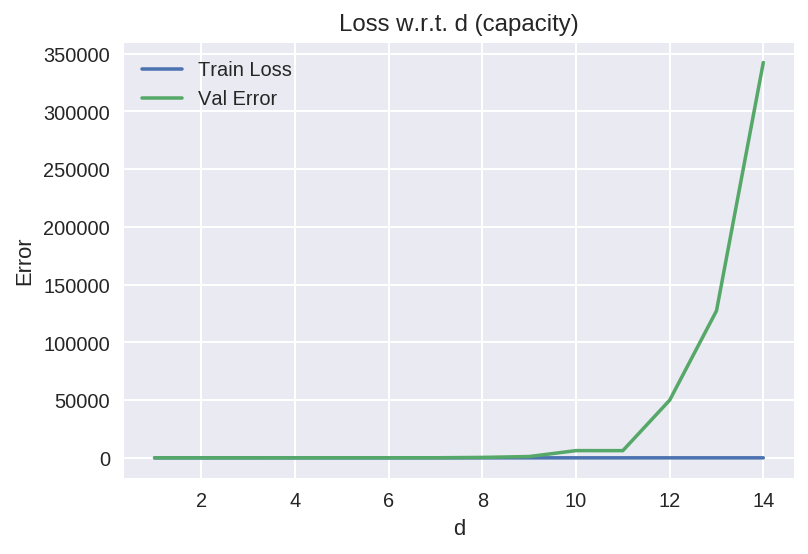

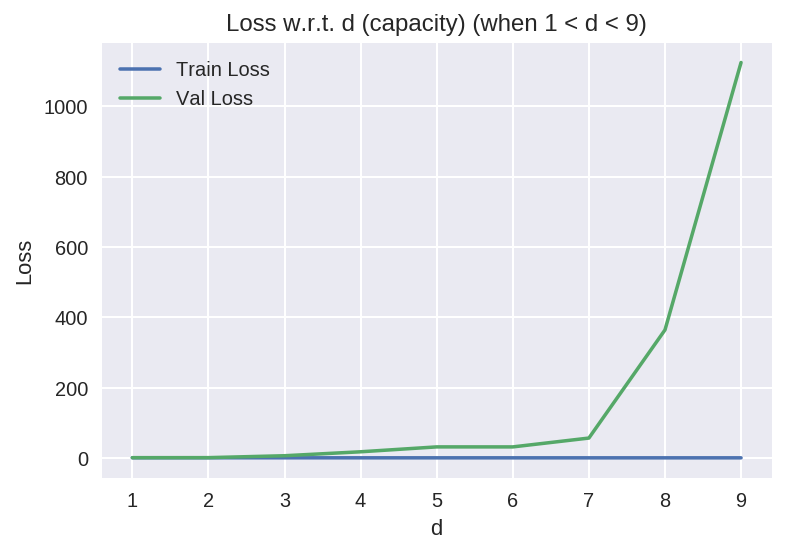

train_loss:  [0.87 0.81 0.68 0.63 0.61 0.6  0.59 0.59 0.59]
val_loss:  [1.00000e+00 1.14000e+00 6.55000e+00 1.77800e+01 3.16900e+01 3.16400e+01
 5.67900e+01 3.64120e+02 1.12422e+03]

the loss (train, val) is 0.8692 1.0007 and the optimal point is d=1


In [52]:
## Finding the mean evaluation loss that will result in lowest evaluation error for d capacity
sum_train_loss = np.sum([subf1_train_loss,subf2_train_loss,subf3_train_loss,subf4_train_loss], axis=0)
mean_train_loss = sum_train_loss/4

sum_val_loss = np.sum([subf1_val_loss,subf2_val_loss,subf3_val_loss,subf4_val_loss], axis=0)
mean_val_loss = sum_val_loss/4

# List of values of the polynomial degree d
list_d = list(range(1,15))
x = list_d

# plot loss
plot_error_loss(17,x,mean_train_loss,mean_val_loss,'Train Loss','Val Error','Loss w.r.t. d (capacity)','d','Error')

#Exanding section of graph between 1<d<9
plot_error_loss(18,x[:9],mean_train_loss[:9],mean_val_loss[:9],'Train Loss','Val Loss','Loss w.r.t. d (capacity) (when 1 < d < 9)','d','Loss')

#display results for loss
print("train_loss: ",np.round(mean_train_loss[:9],decimals=2))
print("val_loss: ",np.round(mean_val_loss[:9],decimals=2),end="\n\n")

# find the point at which the difference between
# train and val loss is the least, for the optimal capacity
idx = np.argmin(np.abs(mean_train_loss-mean_val_loss))
print("the loss (train, val) is ", np.round(mean_train_loss[idx],decimals=4)," ",\
      np.round(mean_val_loss[idx],decimals=4)," and the optimal point is d=",idx+1,sep="")

##### K-Fold Cross-Validation to find regularisation parameter

In [0]:
def kf_reg (sub_train, sub_val, sub_train_y, sub_val_y, list_range):
    # prepare the list for regularisation
    reg = np.array(list_range,np.float32)
    reg = 10**reg
    list_reg = list(reg)
    
    # from above, d=1 is the optimal capacity
    d = 1 
    poly = PolynomialFeatures(d)

    train_y = sub_train_y
    val_y = sub_val_y

    # declare and initialise vectors to store data
    r_train_error = np.zeros(len(list_reg))
    r_val_error = np.zeros(len(list_reg))
    r_train_loss = np.zeros(len(list_reg))
    r_val_loss = np.zeros(len(list_reg))
    
    # to find the loss for different regularisation parameters
    for i,reg in enumerate(list_reg):
      
      train_X = poly.fit_transform(sub_train[:,0:3]) 
      train_w_solution, r_train_loss[i] = compute_w_solution(train_X,train_y, reg)
    
      val_X = poly.fit_transform(sub_val[:,0:3])
      r_val_loss[i] = loss_mse(train_w_solution,val_X,val_y,reg)
    
    # return array of loss for different regularisation parameters
    return r_train_loss, r_val_loss

In [0]:
# this is to generate a list to 
# iterate through -10 to 10 at 0.1 intervals
def frange(start,stop,step):
  i = start
  while i<stop:
    yield i
    i += step
        
list_range = []

for i in frange(-10.0,10.0,0.1):
    list_range.append(i)
    
#Running through each K-Fold
    
## First K-fold
subf1_r_train_loss, subf1_r_val_loss = kf_reg(subf1_train_data, subf1_val_data, subf1_train_y, subf1_val_y, list_range)

## Second K-fold
subf2_r_train_loss, subf2_r_val_loss = kf_reg(subf2_train_data, subf2_val_data, subf2_train_y, subf2_val_y, list_range)

## Third K-fold
subf3_r_train_loss, subf3_r_val_loss=kf_reg(subf3_train_data, subf3_val_data, subf3_train_y, subf3_val_y,list_range)

## Fourth K-fold
subf4_r_train_loss, subf4_r_val_loss = kf_reg(subf4_train_data, subf4_val_data, subf4_train_y, subf4_val_y,list_range)


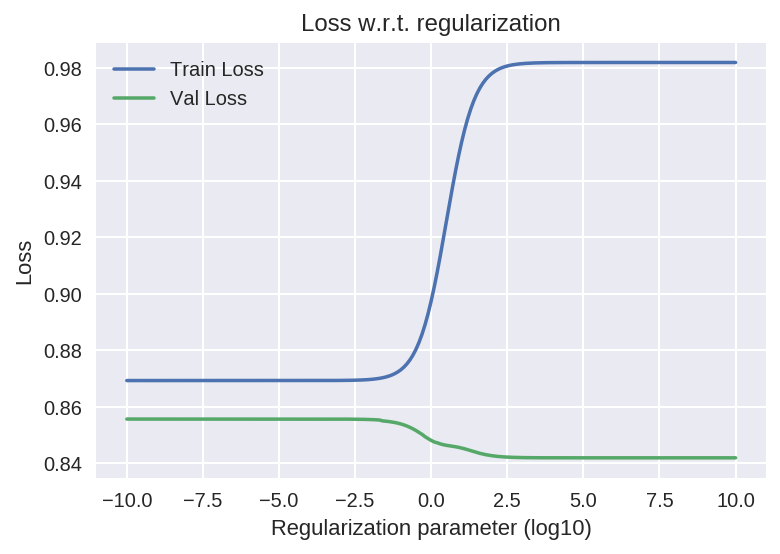

the loss (train, val) is 0.873 0.8539 and the regularisation parameter is 10**-1.0=0.1


In [55]:
## Finding the mean evaluation loss that will result in lowest evaluation error for regularisation parameter

sum_r_train_loss = np.sum([subf1_r_train_loss,subf2_r_train_loss,subf3_r_train_loss,subf4_r_train_loss], axis=0)
mean_r_train_loss = sum_r_train_loss/4

sum_r_val_loss = np.sum([subf1_r_val_loss,subf3_r_val_loss,subf3_r_val_loss,subf4_r_val_loss], axis=0)
mean_r_val_loss = sum_r_val_loss/4

# use parameters in log base 10
reg = np.array(list_range,np.float32)
reg = 10**reg
list_reg = list(reg)
x = np.log10(list_reg)

# plot loss
plot_error_loss(19,x,mean_r_train_loss,mean_r_val_loss,'Train Loss','Val Loss','Loss w.r.t. regularization','Regularization parameter (log10)','Loss')

# from visual inference, the optimal regularisation parameter is found at -1.
for i in range(201):
    if(x[i]==-1):
        idx=i

print("the loss (train, val) is ", np.round(mean_r_train_loss[idx],decimals=4)," ",\
      np.round(mean_r_val_loss[idx],decimals=4)," and the regularisation parameter is 10**",\
      np.round(x[idx],decimals=4),"=", list_reg[idx],sep="")

## Analysis of Results

From the results, in alignment with the notations and definitions listed earlier in this notebook, these are our observations.

|Techinque|Optimal $d$|$\lambda$|Train Loss|Val Loss|
|---------|------------|---------|----------|--------|
|With Normalisation|<center>2|0.794|<center>0.91|<center>0.92|
|Pre-processing |<center>2|0.316|<center>7.25|<center>6.67|
|Removal of Feature 1|<center>3|0.398|<center>1.00|<center>1.01|
|Removal of Feature 2|<center>2|0.316|<center>0.94|<center>0.94|
|Removal of Feature 3|<center>2|1.000|<center>0.98|<center>0.68|
|K-Fold Cross Validation|<center>1|0.100|<center>0.87|<center>0.85|
<br>

The most optimal model consists of the following features:
<br>

|Techinque|Optimal $d$|$\lambda$|Train Loss|Val Loss|
|---------|------------|---------|----------|--------|
|K-Fold Cross Validation|<center>1|0.100|<center>0.87|<center>0.85|
* Normalisation of Data
* Cross Validation Technique
* Existing 3 data feature (Without any removal of data features)
* Optimal $d$: 1
* $\lambda$: 0.1
<br><br>


Even in the process of over-fitting (pre-regularisation), we find that the loss does not go go below 0.6 for all the different test cases and variations. 

Therefore, we make the following conclusions:
* Normalisation incresaes the performance of learning technique in our case. This is in line with the idea that normaliasion is able to reduce and eliminate data redundancy and to ensure that data can compared at the same set scale. This is important since our features have different range where the range for feature 1 is [0.03,6] while the range for feature 2 & 3 is [1,4], which may result in uneven contribution to the model.
<br>
* Cross Validation incresaes the optimisation of data in our case. This may be a result of having an increased number of training data sets from 51 to 68, thus enabling us to repeatedly train and test on an enlarged training data set.
<br>
* The data features may not be the best representation of the closeness, although there is some loose relation. 
<br>
* Learning capacity for the model may not be sufficient, given the low amount of data.
<br>
* A lower capacity model is generally more suitable, in line with the low amount of data.


### Suggestions for Improvement 

#### Collect more training data

We are operating at a low value capacity of $d = 2$. Although at lower capacity, there is no need to collect lots of training data to prevent a high loss error, our loss value at $d = 2$ is still high $(>0.6)$. It is highly likely that we are experiencing a underfitting issue where we have high bias since even in the process of over-fitting (pre-regularisation), the loss does not go go below 0.6 for all the different test cases and variations. In view of this,  we should collect more training data to ensure that we can reach to the maximum learning capacity which is the state where we are able to gather the most meaningful information from our data. The most optimal state is achieved when we are able to produce loss at 0 when we over-fit our data. Also, even if we may overfit our data, at high capacity, collecting a large number of data is also beneficial since the loss value will be greatly reduced and high variance can be fixed. Hence, since we are not able to achieve a very low error when our capacity is low, it will always be beneficial in our case for us to collect more data, to reduce our loss.


#### Selection of more representative data features
 
Although we have collected $194$ sets of data, we have filtered it to $85$ sets of data eventually. This is regrettable since we are not able to fully tap on all the data information we have obtained. Hence, this also highlights on the fact of the importance of design of data questions during the Data Acquisition Process. Ultimately, this has also resulted in us not being able to add in more data features due to the constraint of the survey questions, as questions posed were not the best representation of the perception of closeness. Although we acknowledge that it may not always be possible to obtain the perfect hand-crafted with the highest correlation, we should have been more thoughful when we are selecting and handcrafting our data features. This is because having additional handcrafted features can fix high bias and also ultimately, reducing our loss.

To add on, as these data features are populated through a subjective and often perceptive method, it may in turn result in inaccuracies in the responses given.
 